# Introuduccion

Desde 2019, Commodore64 presta Servicios de Capacitación y
Formación de Técnicos en distintas Áreas (Hardware, Redes, Seguridad
Informática, Diseño/Digitalización y desarrollo de Software).

Ofrecen los cursos en distintas Modalidades (Presenciales, a
Distancia/Online por VideoConferencia, para Empresas en distintas
instalaciones) de acuerdo con las necesidades de cada alumno.

Dada la situación sin precedentes del año 2020 es necesario contar con
un modelo de Analytics que permita analizar los cursos ofrecidos por
diferentes instructores para comprender las tendencias de inscripción y
como se compone la dotación de instructores para ajustar la capacidad
de las clases presenciales según el protocolo de seguridad.



# Requerimientos

1. El área de inscripciones requiere poder consultar:

Evolución de las inscripciones en cada temporada, según curso,
tipo de sala y profesor

Ranking de cursos más pedidos por temporada, horario e
instructor.

Cumplimiento de capacidad real versus esperada.

Características de la dotación de instructores para asignación de
clases según modalidad.

2. El área de Pedagogía requiere poder consultar:

• Análisis de demanda por duración de los cursos.

• Índice de asistencia a clases por modalidad.

• Disponibilidad de instructores por temporada y tasa de asistencia
a clases.

## Analisis exploratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
capacity = pd.read_csv('../sources/CourseCapacity.csv')

In [3]:
capacity

,Course,Course Title,Size,Season
0,MIS 2113-010,Comp Based Info Sys,283,Fall 2020
1,MIS 2113-011,Discussion Session,40,Fall 2020
2,MIS 2113-012,Discussion Session,40,Fall 2020
3,MIS 2113-013,Discussion Session,45,Fall 2020
4,MIS 2113-014,Discussion Session,40,Fall 2020
...,...,...,...,...
296,MIS 3033-002,Visual Basic Programming,100,Summer 2020
297,MIS 3353-100,Database,50,Summer 2020
298,MIS 3363-200,Infrastructure,70,Summer 2020
299,MIS 3373-100,Systems Theory,65,Summer 2020


In [4]:
capacity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Course        301 non-null    object
 1   Course Title  301 non-null    object
 2   Size          301 non-null    int64 
 3   Season        301 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.5+ KB


In [5]:
capacity['Course'].value_counts()

MIS 3033-001    7
MIS 3033-002    7
MIS 4663-903    6
MIS 3033-003    6
MIS 3353-001    6
               ..
MIS 3013-010    1
MIS 3013-011    1
MIS 3013-012    1
MIS 3013-013    1
MIS 3373-100    1
Name: Course, Length: 126, dtype: int64

In [6]:
capacity['Course Title'].value_counts()

Comp Based Info Sys              48
Discussion Session               45
Infrastructure                   26
Systems Theory                   24
Systems Project                  23
C Programming                    23
Databases                        23
JAVA Programming                 16
Visual Basic                     13
Advanced Database                 7
OO System Design                  6
MIS Field Project                 5
Digital Media                     4
C++ Programming                   4
Sem-Mgt Info Sys                  3
Info Access Mgt                   3
Knowledge Management              3
IT Enabled E-Business             2
JAVA                              2
C Programmimg                     2
Project Management                2
Sys Arch & Design                 2
Intensive COBOL                   2
Telecommunications                2
IT Management                     1
Prototyping & Rapid Appl Dev      1
Comm & Decision Proc              1
IT Enabled E-Comm           

In [7]:
capacity.sort_values('Size', ascending=False)

,Course,Course Title,Size,Season
232,MIS 2113-020,Comp Based Info Sys,300,Spring 2020
103,MIS 4663-901,MIS Field Project,300,Fall 2019
215,MIS 4663-904,Systems Project,300,Spring 2019
9,MIS 2113-020,Comp Based Info Sys,290,Fall 2020
265,MIS 4663-900,Systems Project,290,Spring 2020
...,...,...,...,...
45,MIS 4663-903,Systems Project,35,Fall 2020
200,MIS 3363-003,Infrastructure,35,Spring 2019
79,MIS 3033-001,JAVA Programming,35,Fall 2019
50,MIS 5003-900,Sem-Mgt Info Sys,35,Fall 2020


In [8]:
instructors = pd.read_excel('../sources/Instructors.xlsx')

In [9]:
instructors.head()

,Instructor_Nu,Instructor,Street,City,State,ZipCode,Hiring_date,Born_date,Family_Nu,Children_Nu,Commission,CommissionRate
0,1.0,Carter/Ferguson,512 PINE,ADA,OKLAHOMA,90016,2020-04-14 00:55:22.209,1959,1,0,114.60,0.172676
1,2.0,Berry,48 COLLEGE,CAPE GIRARDEAU,MISSOURI,90010,2017-04-13 04:08:40.000,1989,0,3,825.75,0.051255
2,3.0,Chidambaram,419 CHIP,GRANTS,NEW MEXICO,90017,2020-04-16 01:20:50.441,1984,1,0,1045.75,0.360825
3,4.0,Cappabianco,16 ELM,LANSING,MICHIGAN,90013,2020-07-22 17:19:03.252,1987,4,0,1817.50,0.497703
4,5.0,Fraley,2192 BEXLEY,ADA,OKLAHOMA,90025,2017-04-12 14:14:39.000,1955,1,1,750.00,0.169555


<AxesSubplot:>

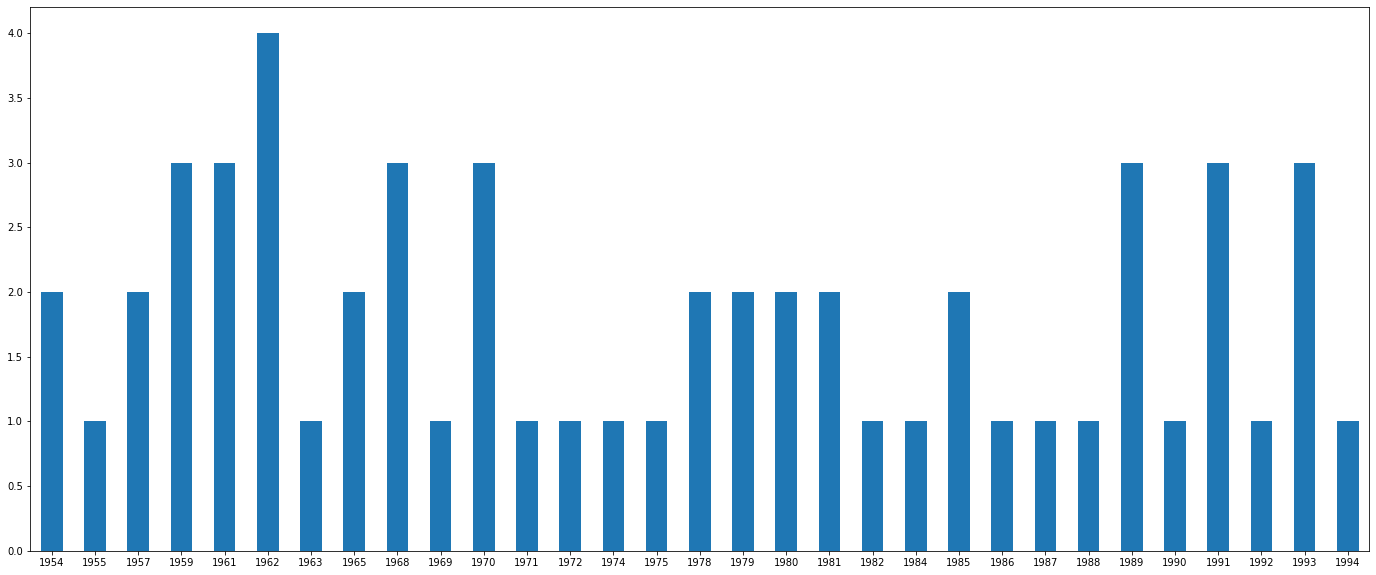

In [10]:
instructors['Born_date'].value_counts().sort_index().plot(kind='bar',figsize=(24,10),rot=0 )

In [11]:
room_types = pd.read_excel('../sources/Room Types.xlsx')

In [12]:
room_types.head()

,BUILDING,ROOM,TYPE
0,Adams Hall,07H,t/b
1,Adams Hall,100,t/c
2,Adams Hall,101,t/a
3,Adams Hall,104,t/b
4,Adams Hall,112,t/a


### Importar Microsot Access Database

In [13]:
import pyodbc
[x for x in pyodbc.drivers() if x.startswith('Microsoft Access Driver')]

['Microsoft Access Driver (*.mdb, *.accdb)']

In [14]:
conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    r'DBQ=../sources/course offerings.accdb;'
    )
cnxn = pyodbc.connect(conn_str)
cursor = cnxn.cursor()

In [15]:
from collections import OrderedDict

# referencia de días a códigos 
weekday_code_map = OrderedDict(
Monday='M',
Tuesday='T',
Wednesday='W',
Thursday='R',
Friday='F'
)

# order cronológico en hemisferio Norte (invierno empieza el 21 de Diciembre)
ordered_seasons = ['winter', 'spring', 'summer', 'fall']

In [16]:
# asumimos que los nombres de tablas van a seguir respetando el formato '<temporada> <AAAA>'.
def _keep_table(table_name, seasons=ordered_seasons, min_y=2000, max_y=2099):
    s_y = table_name.split()
    return (len(s_y) == 2) and (s_y[0].lower() in seasons) and s_y[1].isnumeric() and (min_y <= int(s_y[1]) <= max_y)

# obtener el nombre de las tablas
tables = [t.table_name for t in cursor.tables(tableType='TABLE') if _keep_table(t.table_name)]
tables

['Fall 2019',
 'Fall 2020',
 'Fall 2021',
 'Spring 2019',
 'Spring 2020',
 'Summer 2019',
 'Summer 2020']

In [17]:
dfs = list()
for t in tables:
    df = pd.read_sql(f'select * from "{t}"', cnxn)
    
    # Separar temporada y año, agregar una columna para ordenar cronológicamente temporadas
    season, year = t.split()
    df['Season'] = season
    df['Season Order'] = ordered_seasons.index(season.lower()) + 1
    df['Year'] = int(year)
    
    # Aplanar la columna 'Days'
    for weekday, code in weekday_code_map.items():
        df[weekday] = df['Days'].apply(lambda x: code in x.strip().split(','))
    del df['Days']
    
    # Convertir el Datetime inferido a hora
    df['Hours'] = df['Hours'].dt.strftime("%H:%M:%S")

    # agregar el dataframe a una lista para luego concatenarlos (normalizar nombre de la primer columna)
    dfs.append(df.rename(columns={df.columns[0]: 'Course'}))
    
seasons = pd.concat(dfs)

In [18]:
seasons

,Course,Course Title,Hours,Instructor,Room,Male Enrolled,Female Enrolled,Season,Season Order,Year,Monday,Tuesday,Wednesday,Thursday,Friday
0,MIS 2113/3113-001,Comp Based Info Sys,07:30:00,Cappabianco,AH 100,34.0,18.0,Fall,4,2019,True,False,True,False,True
1,MIS 2113/3113-002,Comp Based Info Sys,07:30:00,Southern,AH 100,25.0,16.0,Fall,4,2019,False,True,False,True,False
2,MIS 2113/3113-003,Comp Based Info Sys,11:30:00,Ratwatte,AH 100,27.0,21.0,Fall,4,2019,True,False,True,False,True
3,MIS 2113/3113-004,Comp Based Info Sys,12:30:00,Berry,AH 100,41.0,29.0,Fall,4,2019,True,False,True,False,True
4,MIS 2113/3113-005,Comp Based Info Sys,13:30:00,Ratwatte,AH 104,35.0,22.0,Fall,4,2019,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,MIS 3033-002,Visual Basic Programming,12:50:00,Ratwatte,AH 304,64.0,41.0,Summer,3,2020,True,True,True,True,True
6,MIS 3353-100,Database,09:20:00,Kemp,AH 355,23.0,26.0,Summer,3,2020,True,True,True,True,True
7,MIS 3363-200,Infrastructure,15:10:00,Schwarzkopf,AH 315,23.0,39.0,Summer,3,2020,True,True,True,True,False
8,MIS 3373-100,Systems Theory,10:30:00,Kemp,AH 315,32.0,35.0,Summer,3,2020,True,True,True,True,True


In [19]:
rooms = pd.read_sql(f'select * from Rooms', cnxn)

## 1) Evolución de las inscripciones en cada temporada, según curso,tipo de sala y profesor


### Evolucion de las inscripciones en cada temporada

In [20]:
enrolled_by_season = seasons.groupby(['Season','Year'])[['Male Enrolled','Female Enrolled']].sum()
enrolled_by_season = enrolled_by_season.reset_index()
enrolled_by_season['Enrolled'] = enrolled_by_season['Male Enrolled'] + enrolled_by_season['Female Enrolled'] 
enrolled_by_season

,Season,Year,Male Enrolled,Female Enrolled,Enrolled
0,Fall,2019,1920.0,1530.0,3450.0
1,Fall,2020,1935.0,1510.0,3445.0
2,Fall,2021,1478.0,1545.0,3023.0
3,Spring,2019,2099.0,1871.0,3970.0
4,Spring,2020,1938.0,1773.0,3711.0
5,Summer,2019,517.0,504.0,1021.0
6,Summer,2020,341.0,309.0,650.0


<AxesSubplot:xlabel='Year'>

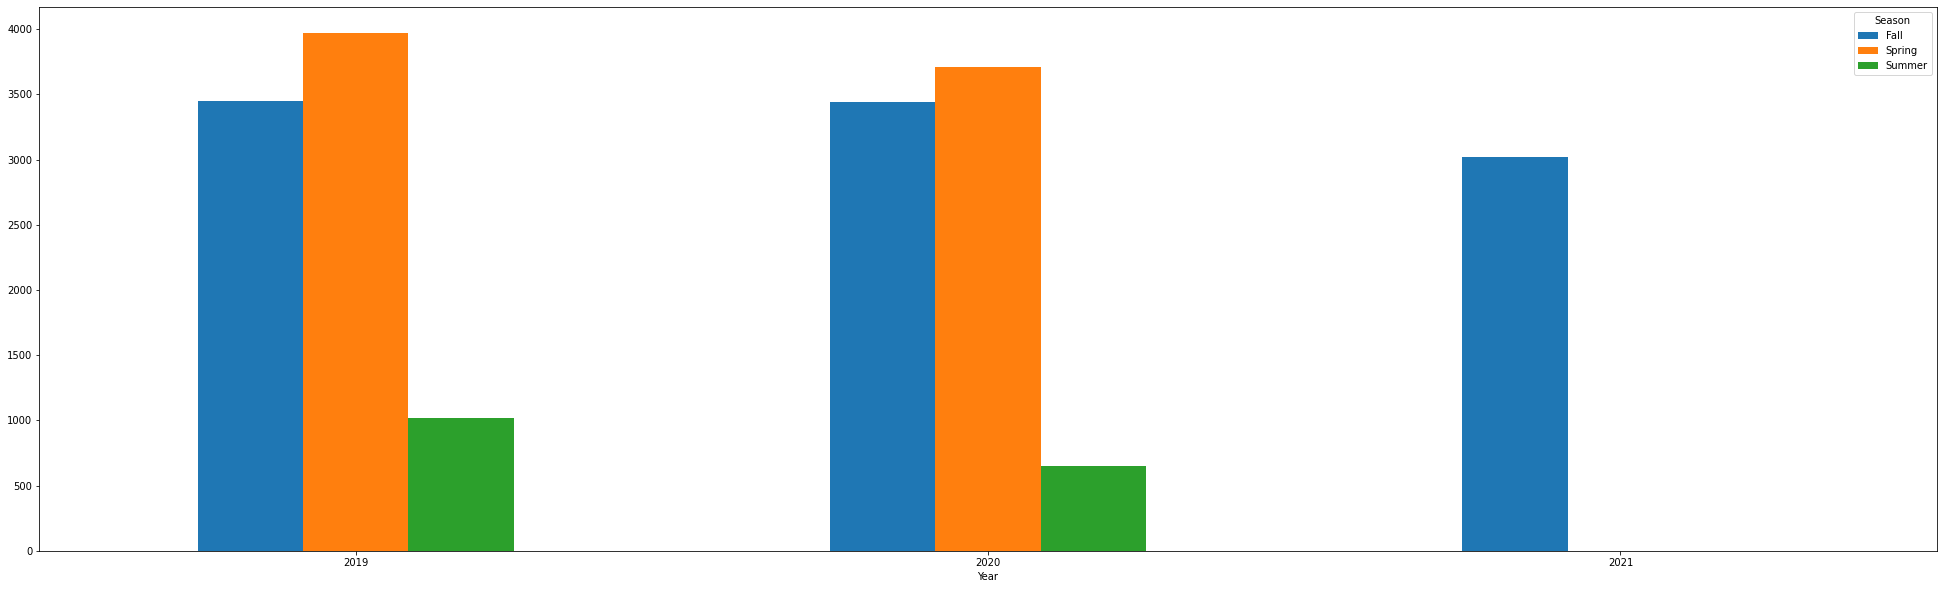

In [21]:
enrolled_by_season.pivot('Year','Season','Enrolled').plot.bar(figsize=(34,10), rot=0)

### Evolucion de las inscripciones en cada temporada por curso

In [22]:
seasons['Course Title'].value_counts().head(5)

Comp Based Info Sys    48
Discussion Session     45
Infrastructure         26
Systems Theory         24
C Programming          23
Name: Course Title, dtype: int64

In [23]:
seasons_by_course = seasons.groupby(['Season','Year','Course Title'])[['Male Enrolled','Female Enrolled']].sum()
seasons_by_course = seasons_by_course.reset_index()
seasons_by_course['Enrolled'] = seasons_by_course['Male Enrolled'] + seasons_by_course['Female Enrolled'] 
seasons_by_course.head(15)

,Season,Year,Course Title,Male Enrolled,Female Enrolled,Enrolled
0,Fall,2019,Advanced Database,43.0,36.0,79.0
1,Fall,2019,C Programming,140.0,150.0,290.0
2,Fall,2019,C++ Programming,13.0,23.0,36.0
3,Fall,2019,Comm & Decision Proc,29.0,15.0,44.0
4,Fall,2019,Comp Based Info Sys,477.0,319.0,796.0
5,Fall,2019,Databases,154.0,97.0,251.0
6,Fall,2019,Digital Media,21.0,15.0,36.0
7,Fall,2019,IT Enabled E-Comm,18.0,23.0,41.0
8,Fall,2019,Info Access Mgt,19.0,34.0,53.0
9,Fall,2019,Infrastructure,199.0,161.0,360.0


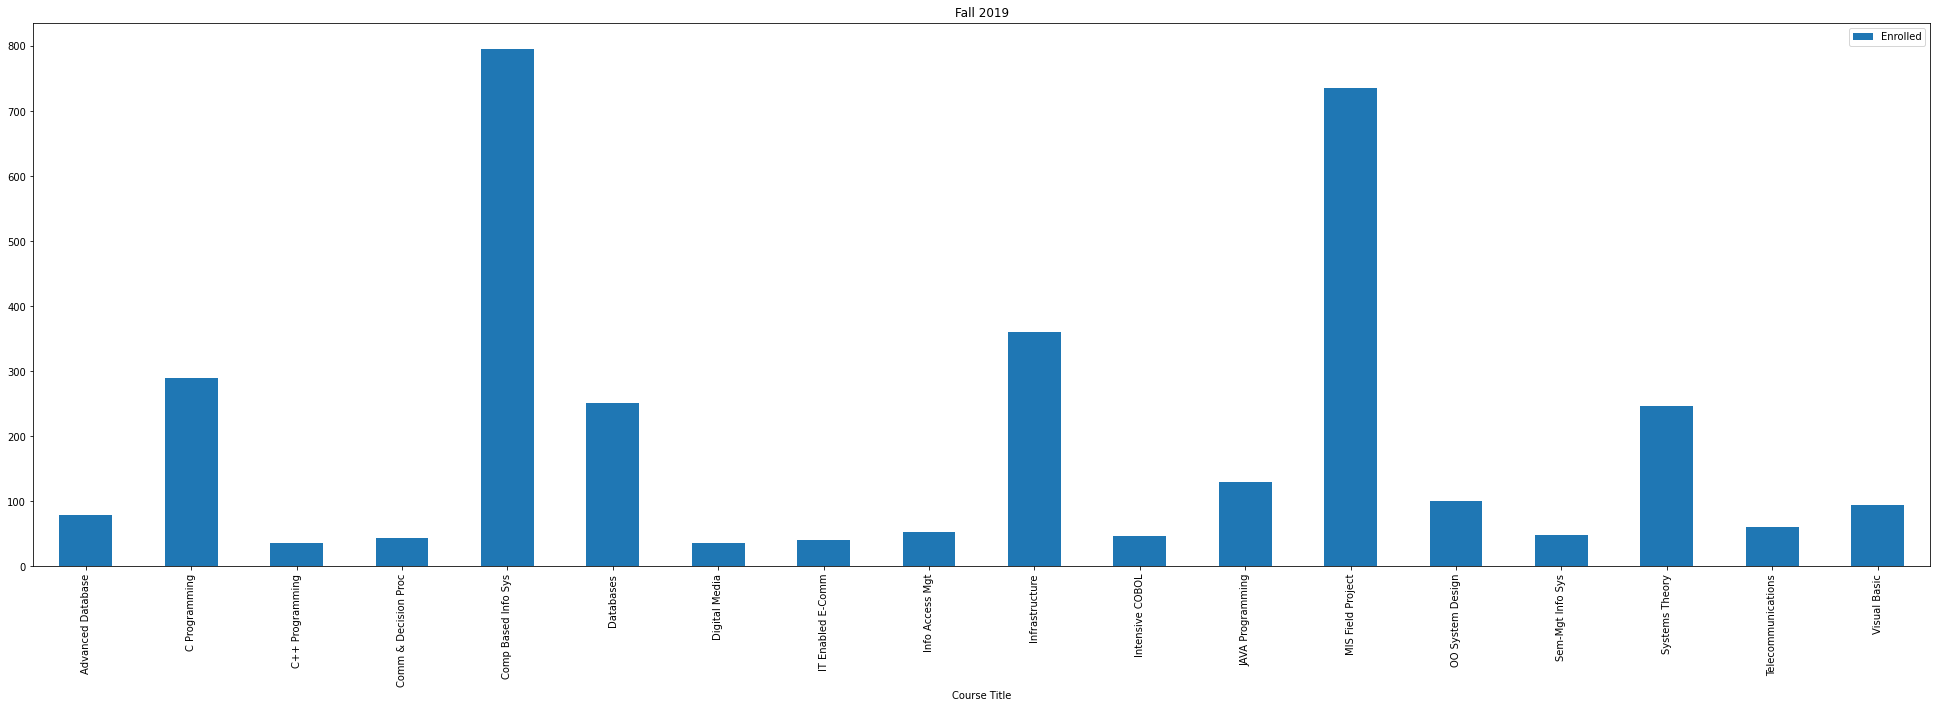

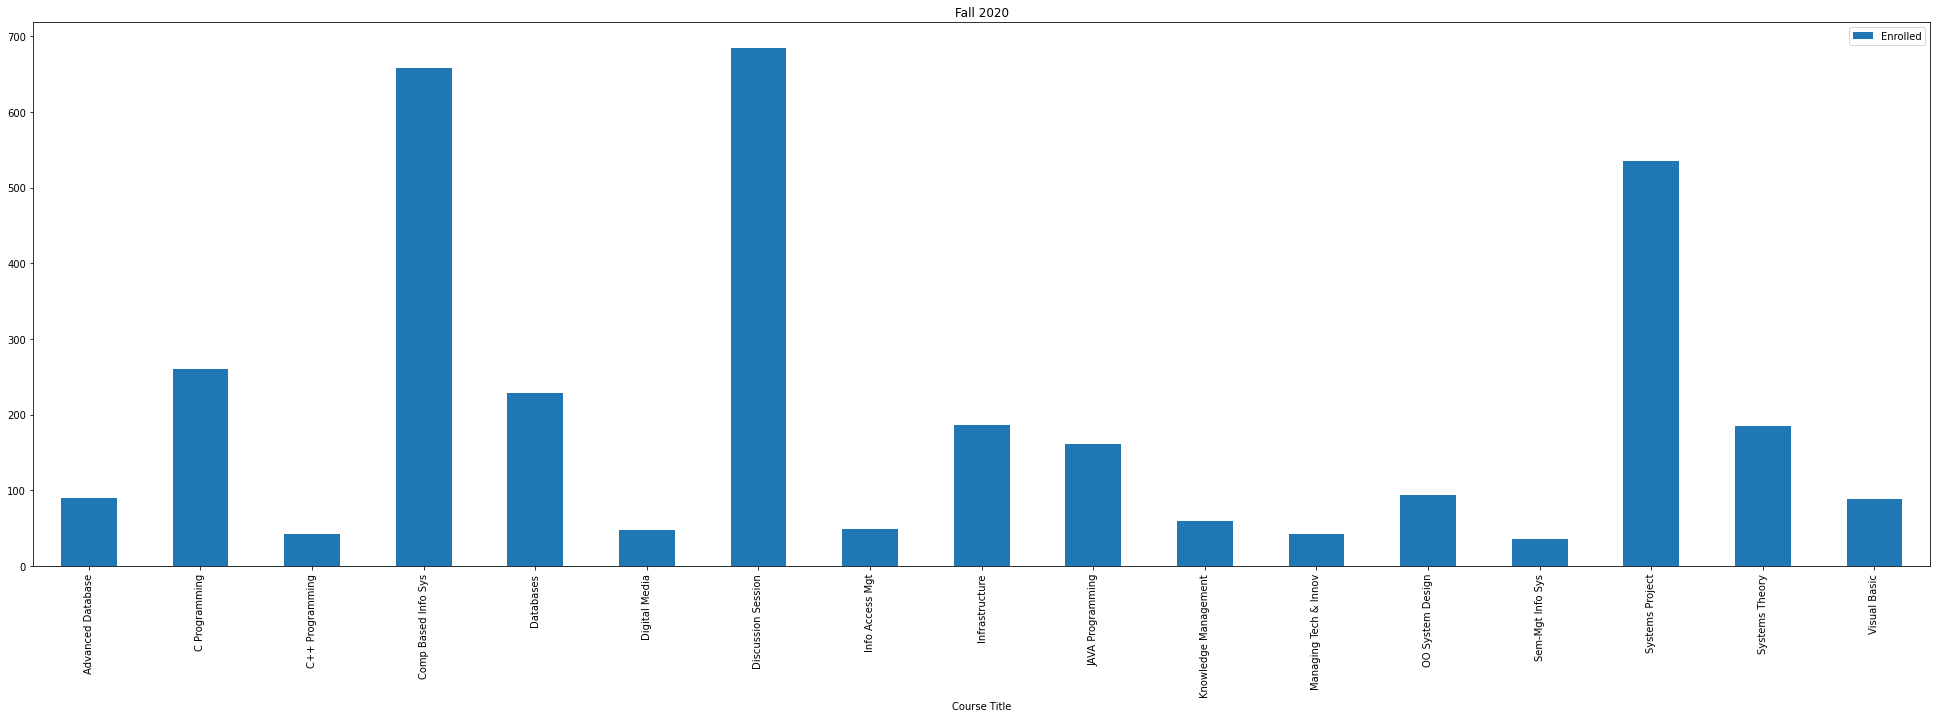

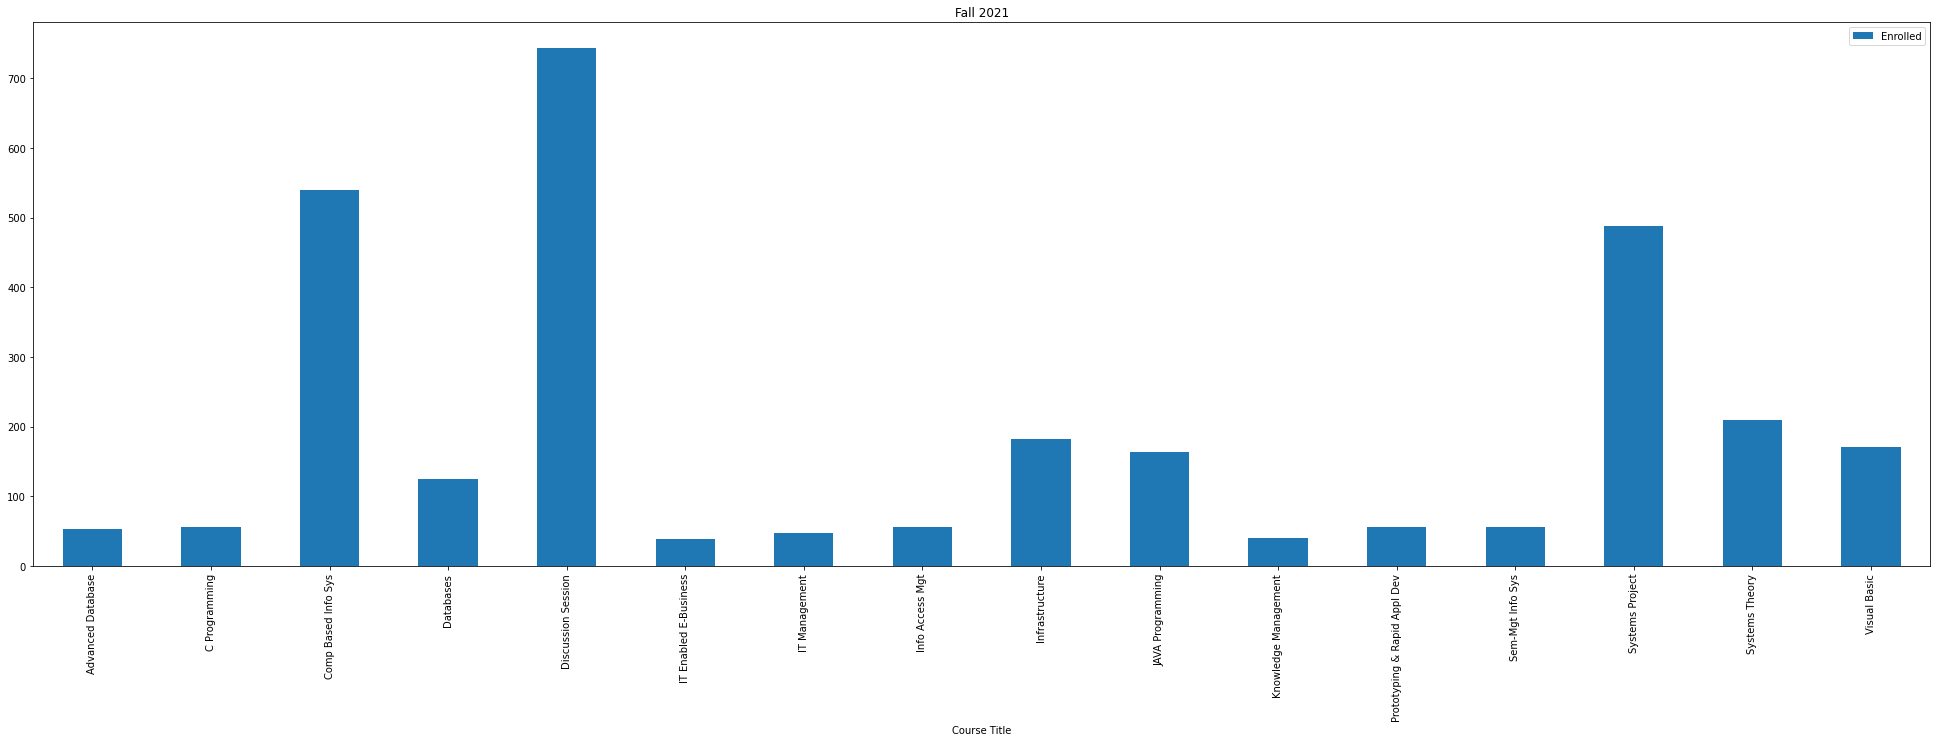

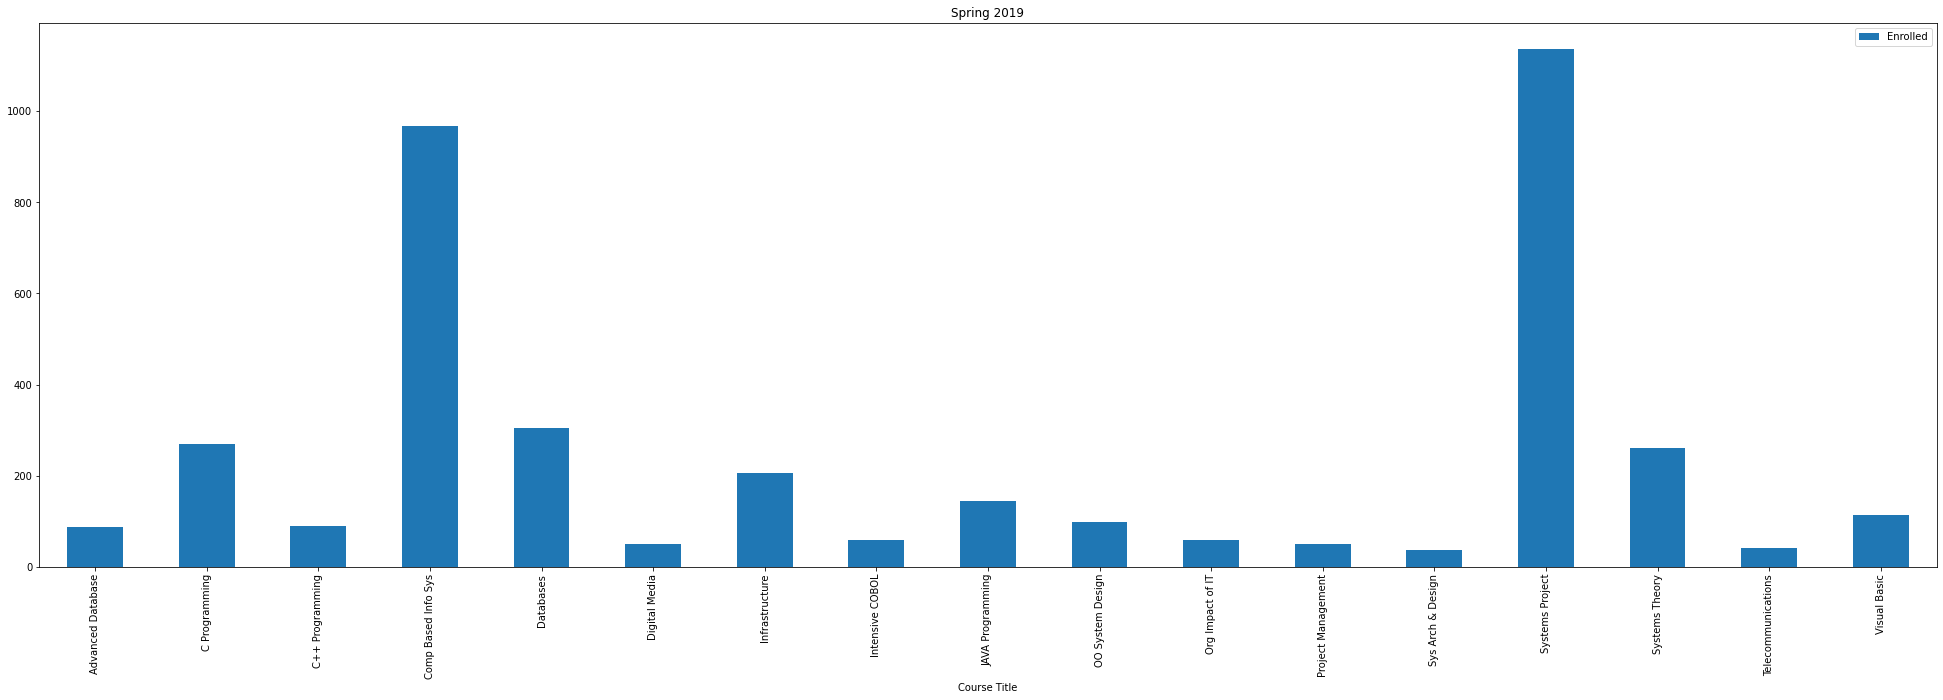

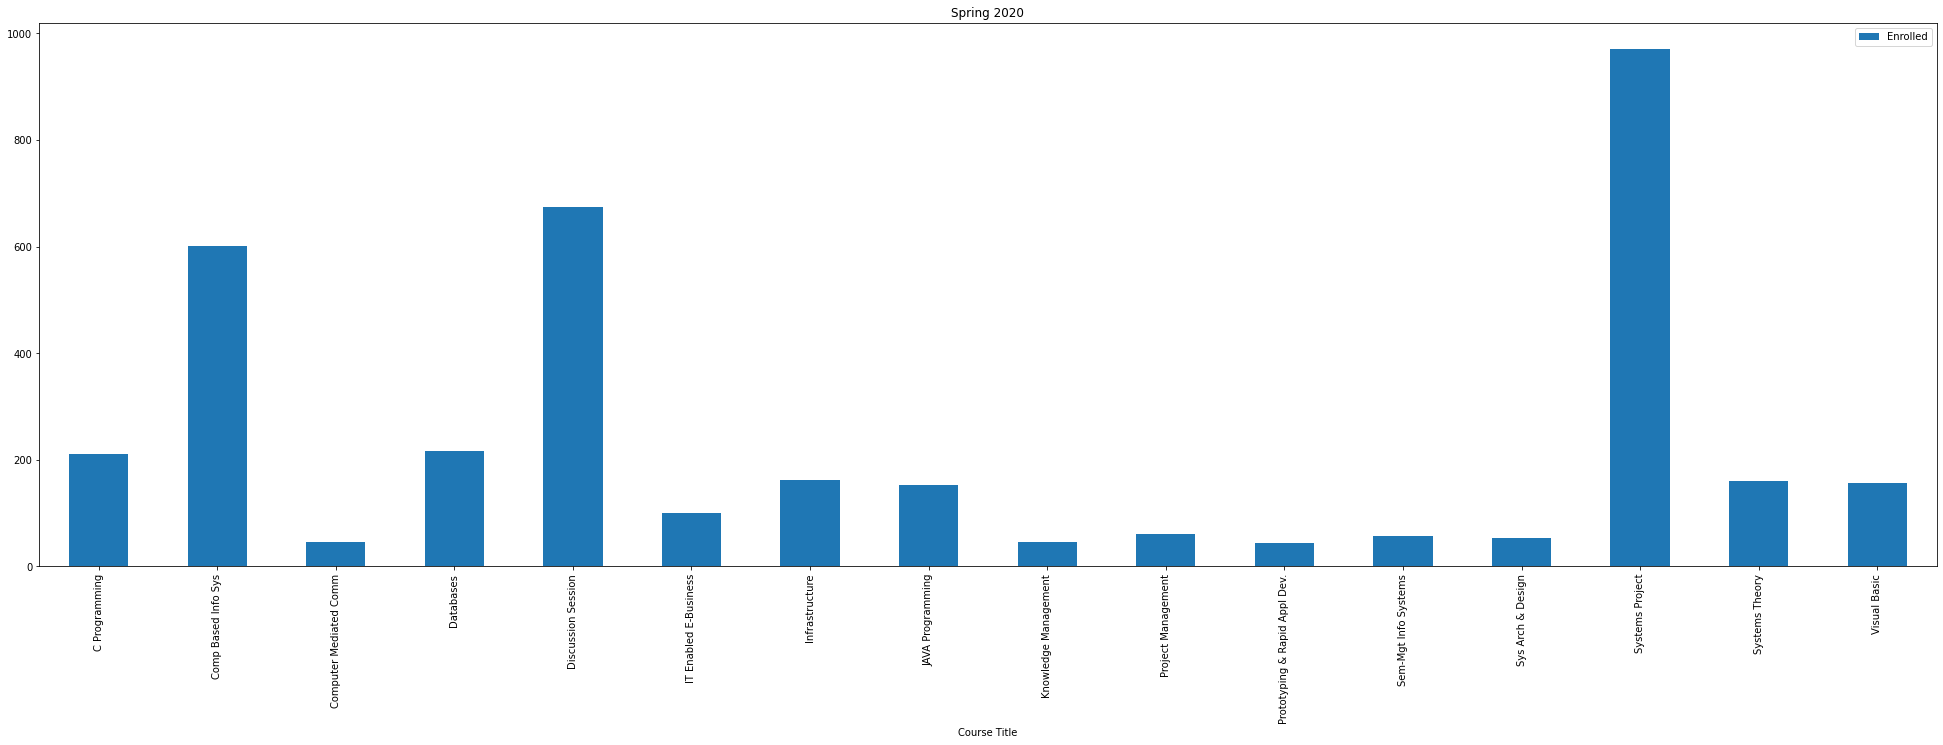

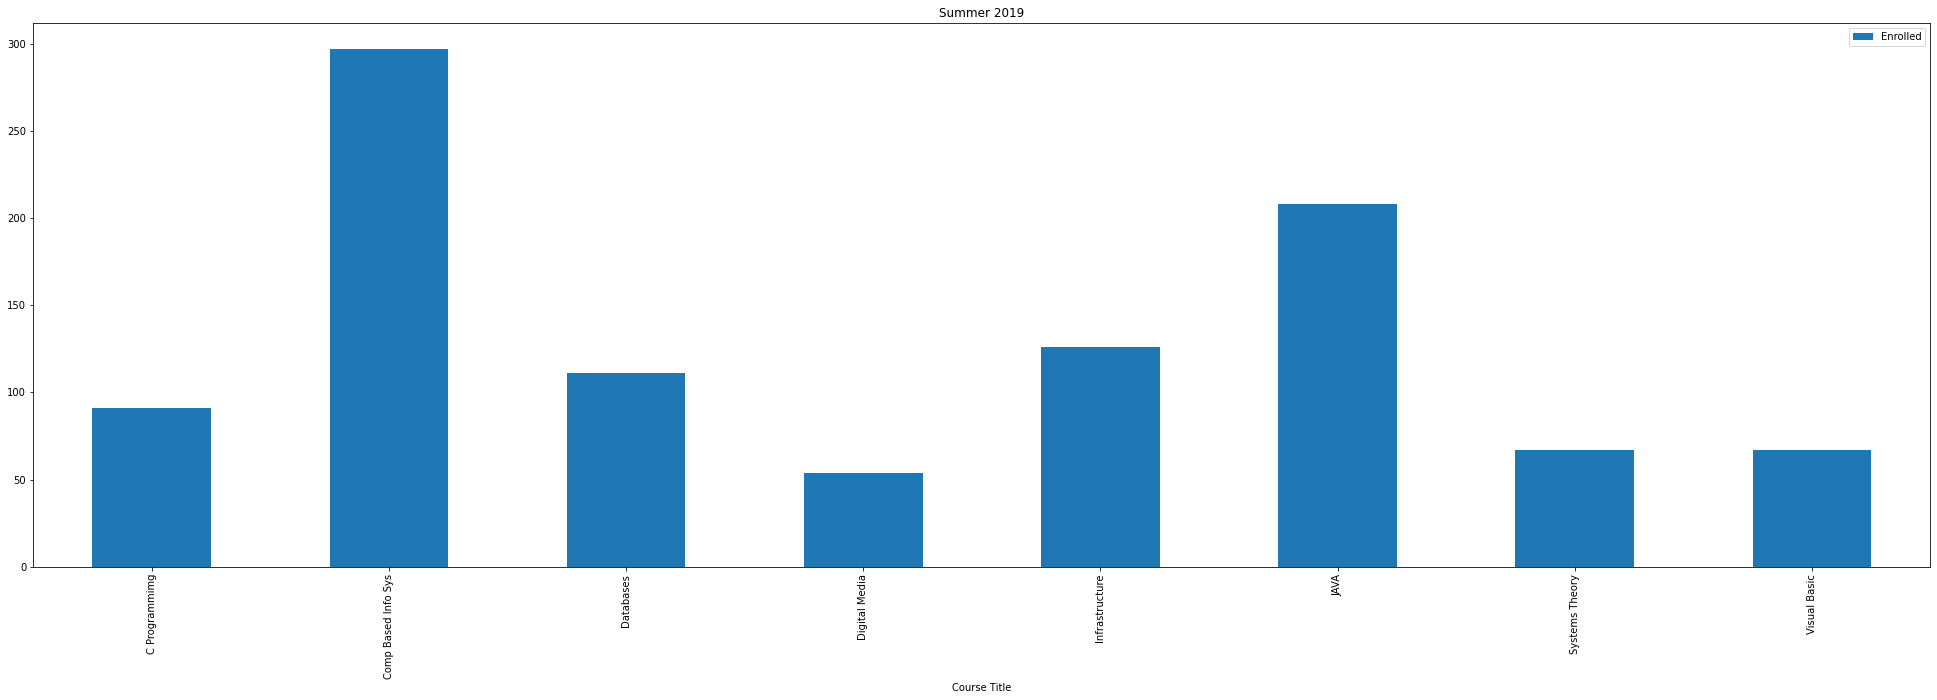

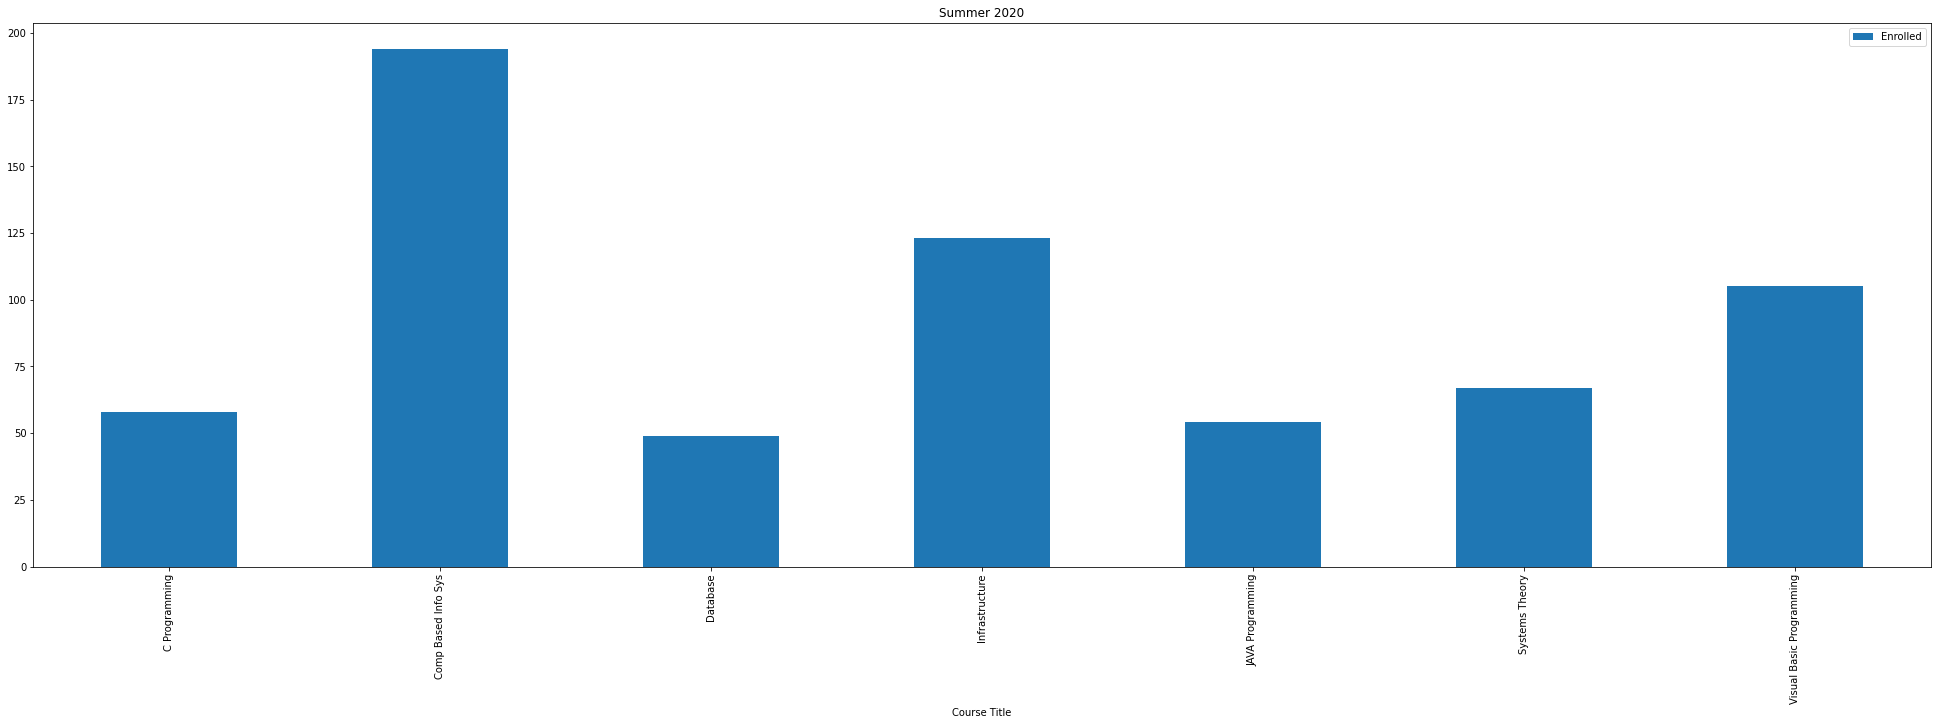

In [24]:
for title, group in seasons_by_course.groupby(['Season','Year']):    
    group.plot.bar(x='Course Title', y='Enrolled',figsize=(34,10), title=str(title[0])+ ' ' + str(title[1]) )

## Por tipo de sala

Debemos unir la tabla de cada temporada segun el room, obteniendo datos del nombre del building de la tabla Rooms, y el tipo de sala del archivo Room Types.csv

In [25]:
room_types.head()

,BUILDING,ROOM,TYPE
0,Adams Hall,07H,t/b
1,Adams Hall,100,t/c
2,Adams Hall,101,t/a
3,Adams Hall,104,t/b
4,Adams Hall,112,t/a


In [26]:
room_types['TYPE'].value_counts()

t/b    19
t/c    12
t/a     9
twa     1
Name: TYPE, dtype: int64

In [27]:
room_types['TYPE'] = room_types['TYPE'].replace('twa','t/a')

In [28]:
room_types['TYPE'].value_counts()

t/b    19
t/c    12
t/a    10
Name: TYPE, dtype: int64

In [29]:
room_types['BUILDING'].value_counts()

Physical Sciences Center    15
Adams Hall                  14
Bizzell Library              6
George Lynn Cross Hall       3
Copeland Hall                2
Nichols Center               1
Name: BUILDING, dtype: int64

In [30]:
seasons[['room_location','room_number']] = seasons['Room'].str.split(' ', 1, expand=True)

In [31]:
seasons.head(15)

,Course,Course Title,Hours,Instructor,Room,Male Enrolled,Female Enrolled,Season,Season Order,Year,Monday,Tuesday,Wednesday,Thursday,Friday,room_location,room_number
0,MIS 2113/3113-001,Comp Based Info Sys,07:30:00,Cappabianco,AH 100,34.0,18.0,Fall,4,2019,True,False,True,False,True,AH,100
1,MIS 2113/3113-002,Comp Based Info Sys,07:30:00,Southern,AH 100,25.0,16.0,Fall,4,2019,False,True,False,True,False,AH,100
2,MIS 2113/3113-003,Comp Based Info Sys,11:30:00,Ratwatte,AH 100,27.0,21.0,Fall,4,2019,True,False,True,False,True,AH,100
3,MIS 2113/3113-004,Comp Based Info Sys,12:30:00,Berry,AH 100,41.0,29.0,Fall,4,2019,True,False,True,False,True,AH,100
4,MIS 2113/3113-005,Comp Based Info Sys,13:30:00,Ratwatte,AH 104,35.0,22.0,Fall,4,2019,True,False,True,False,True,AH,104
5,MIS 2113/3113-006,Comp Based Info Sys,09:00:00,Ferguson,ARM 101,23.0,11.0,Fall,4,2019,False,True,False,True,False,ARM,101
6,MIS 2113/3113-007,Comp Based Info Sys,10:30:00,Fraley,SEC PO 203,28.0,14.0,Fall,4,2019,False,True,False,True,False,SEC,PO 203
7,MIS 2113/3113-008,Comp Based Info Sys,12:00:00,Crew,AH 311,34.0,18.0,Fall,4,2019,False,True,False,True,False,AH,311
8,MIS 2113/3113-009,Comp Based Info Sys,13:30:00,Ferguson,BL 102,25.0,16.0,Fall,4,2019,False,True,False,True,False,BL,102
9,MIS 2113/3113-010,Comp Based Info Sys,12:00:00,Fraley,FH 334,27.0,21.0,Fall,4,2019,False,True,False,True,False,FH,334


In [32]:
rooms.head()

,ROOM,SEATS,LOCATION,Location Name
0,07H,24.0,AH,Adams Hall
1,100,42.0,AH,Adams Hall
2,101,45.0,AH,Adams Hall
3,104,67.0,AH,Adams Hall
4,112,42.0,AH,Adams Hall


In [33]:
seasons = pd.merge(seasons, rooms,  how='left', left_on=['room_location','room_number'], right_on = ['LOCATION','ROOM'])
seasons.head(20)

,Course,Course Title,Hours,Instructor,Room,Male Enrolled,Female Enrolled,Season,Season Order,Year,...,Tuesday,Wednesday,Thursday,Friday,room_location,room_number,ROOM,SEATS,LOCATION,Location Name
0,MIS 2113/3113-001,Comp Based Info Sys,07:30:00,Cappabianco,AH 100,34.0,18.0,Fall,4,2019,...,False,True,False,True,AH,100,100,42.0,AH,Adams Hall
1,MIS 2113/3113-002,Comp Based Info Sys,07:30:00,Southern,AH 100,25.0,16.0,Fall,4,2019,...,True,False,True,False,AH,100,100,42.0,AH,Adams Hall
2,MIS 2113/3113-003,Comp Based Info Sys,11:30:00,Ratwatte,AH 100,27.0,21.0,Fall,4,2019,...,False,True,False,True,AH,100,100,42.0,AH,Adams Hall
3,MIS 2113/3113-004,Comp Based Info Sys,12:30:00,Berry,AH 100,41.0,29.0,Fall,4,2019,...,False,True,False,True,AH,100,100,42.0,AH,Adams Hall
4,MIS 2113/3113-005,Comp Based Info Sys,13:30:00,Ratwatte,AH 104,35.0,22.0,Fall,4,2019,...,False,True,False,True,AH,104,104,67.0,AH,Adams Hall
5,MIS 2113/3113-006,Comp Based Info Sys,09:00:00,Ferguson,ARM 101,23.0,11.0,Fall,4,2019,...,True,False,True,False,ARM,101,NaN,NaN,NaN,NaN
6,MIS 2113/3113-007,Comp Based Info Sys,10:30:00,Fraley,SEC PO 203,28.0,14.0,Fall,4,2019,...,True,False,True,False,SEC,PO 203,NaN,NaN,NaN,NaN
7,MIS 2113/3113-008,Comp Based Info Sys,12:00:00,Crew,AH 311,34.0,18.0,Fall,4,2019,...,True,False,True,False,AH,311,311,42.0,AH,Adams Hall
8,MIS 2113/3113-009,Comp Based Info Sys,13:30:00,Ferguson,BL 102,25.0,16.0,Fall,4,2019,...,True,False,True,False,BL,102,102,40.0,BL,Bizzell Library
9,MIS 2113/3113-010,Comp Based Info Sys,12:00:00,Fraley,FH 334,27.0,21.0,Fall,4,2019,...,True,False,True,False,FH,334,NaN,NaN,NaN,NaN


In [34]:
seasons['Location Name'].value_counts()

Adams Hall                  232
Physical Sciences Center      4
Bizzell Library               3
George Lynn Cross Hall        2
Name: Location Name, dtype: int64

In [35]:
seasons['Location Name'].isna().sum()

60

In [36]:
seasons['ROOM'] = seasons['ROOM'].astype(str)
room_types['ROOM'] = room_types['ROOM'].astype(str)

In [37]:
seasons = pd.merge(seasons, room_types, how='left', left_on=['Location Name','ROOM'], right_on=['BUILDING','ROOM'])

In [38]:
seasons.head(25)

,Course,Course Title,Hours,Instructor,Room,Male Enrolled,Female Enrolled,Season,Season Order,Year,...,Thursday,Friday,room_location,room_number,ROOM,SEATS,LOCATION,Location Name,BUILDING,TYPE
0,MIS 2113/3113-001,Comp Based Info Sys,07:30:00,Cappabianco,AH 100,34.0,18.0,Fall,4,2019,...,False,True,AH,100,100,42.0,AH,Adams Hall,Adams Hall,t/c
1,MIS 2113/3113-002,Comp Based Info Sys,07:30:00,Southern,AH 100,25.0,16.0,Fall,4,2019,...,True,False,AH,100,100,42.0,AH,Adams Hall,Adams Hall,t/c
2,MIS 2113/3113-003,Comp Based Info Sys,11:30:00,Ratwatte,AH 100,27.0,21.0,Fall,4,2019,...,False,True,AH,100,100,42.0,AH,Adams Hall,Adams Hall,t/c
3,MIS 2113/3113-004,Comp Based Info Sys,12:30:00,Berry,AH 100,41.0,29.0,Fall,4,2019,...,False,True,AH,100,100,42.0,AH,Adams Hall,Adams Hall,t/c
4,MIS 2113/3113-005,Comp Based Info Sys,13:30:00,Ratwatte,AH 104,35.0,22.0,Fall,4,2019,...,False,True,AH,104,104,67.0,AH,Adams Hall,Adams Hall,t/b
5,MIS 2113/3113-006,Comp Based Info Sys,09:00:00,Ferguson,ARM 101,23.0,11.0,Fall,4,2019,...,True,False,ARM,101,nan,NaN,NaN,NaN,NaN,NaN
6,MIS 2113/3113-007,Comp Based Info Sys,10:30:00,Fraley,SEC PO 203,28.0,14.0,Fall,4,2019,...,True,False,SEC,PO 203,nan,NaN,NaN,NaN,NaN,NaN
7,MIS 2113/3113-008,Comp Based Info Sys,12:00:00,Crew,AH 311,34.0,18.0,Fall,4,2019,...,True,False,AH,311,311,42.0,AH,Adams Hall,Adams Hall,t/b
8,MIS 2113/3113-009,Comp Based Info Sys,13:30:00,Ferguson,BL 102,25.0,16.0,Fall,4,2019,...,True,False,BL,102,102,40.0,BL,Bizzell Library,Bizzell Library,t/b
9,MIS 2113/3113-010,Comp Based Info Sys,12:00:00,Fraley,FH 334,27.0,21.0,Fall,4,2019,...,True,False,FH,334,nan,NaN,NaN,NaN,NaN,NaN


In [39]:
seasons['TYPE'].value_counts()

t/a    99
t/b    83
t/c    59
Name: TYPE, dtype: int64

### Evolucion de las inscripciones en cada temporada por tipo de sala

<AxesSubplot:xlabel='Season,Year'>

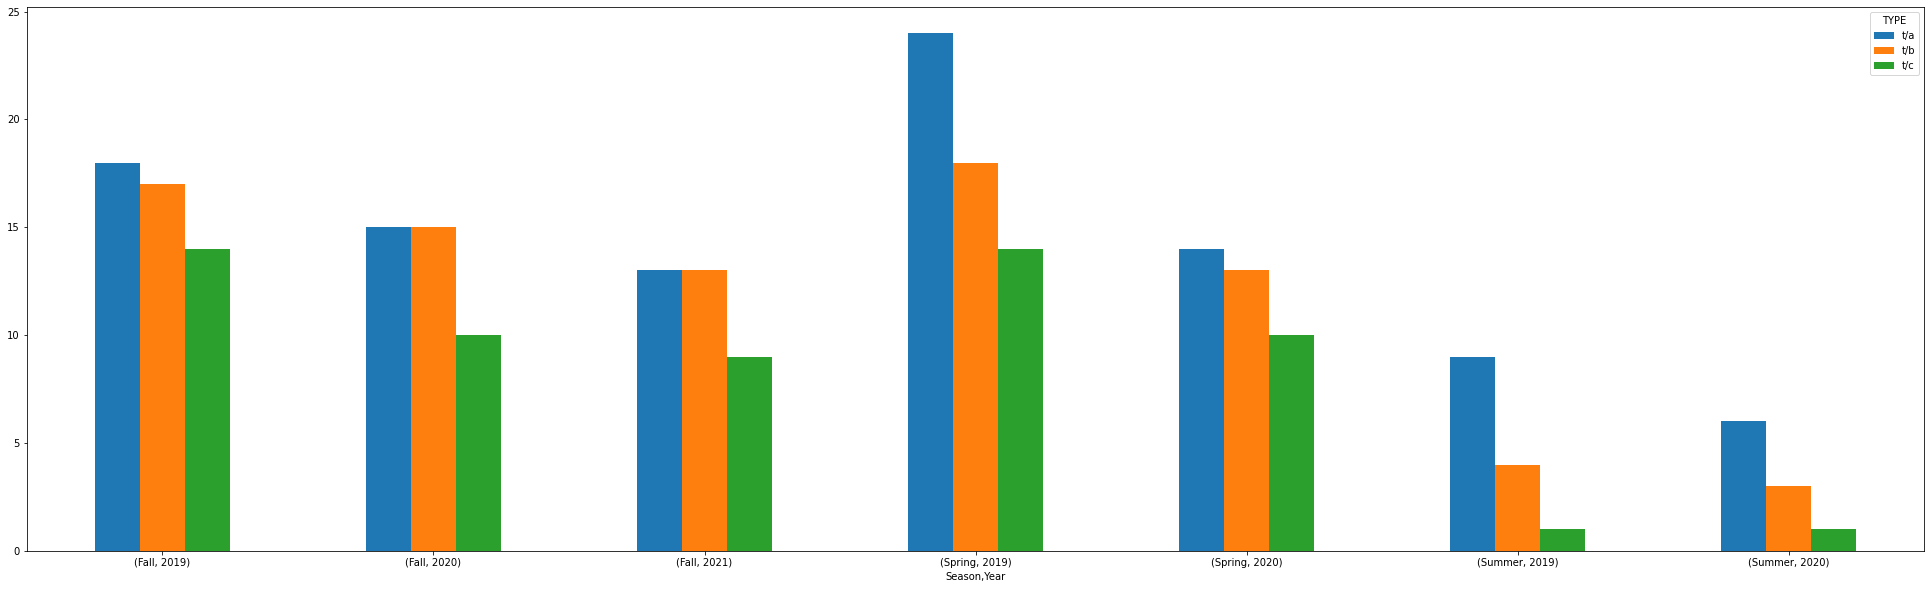

In [40]:
seasons.groupby(['Season','Year','TYPE']).size().unstack(fill_value=0).plot.bar(figsize=(34,10), rot=0)

### Evolucion de las inscripciones de cada curso por temporada

Para mejor visualizacion, se muestran solo aquellos que fueron dictados en las 6 temporadas.

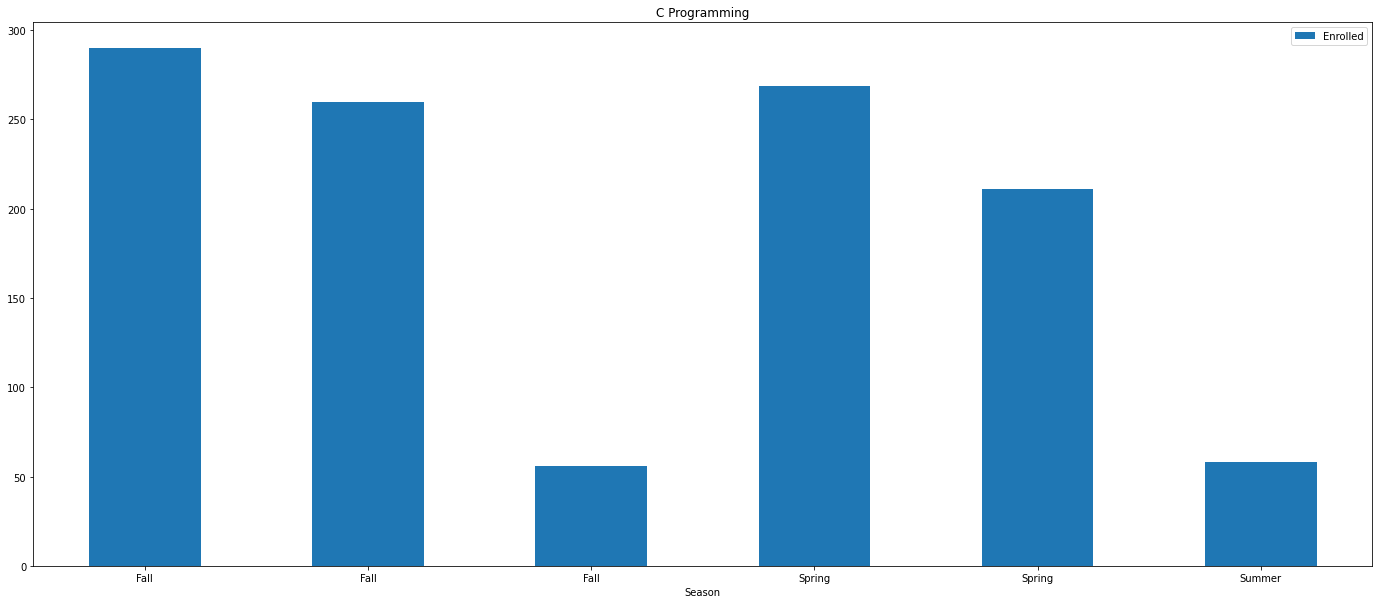

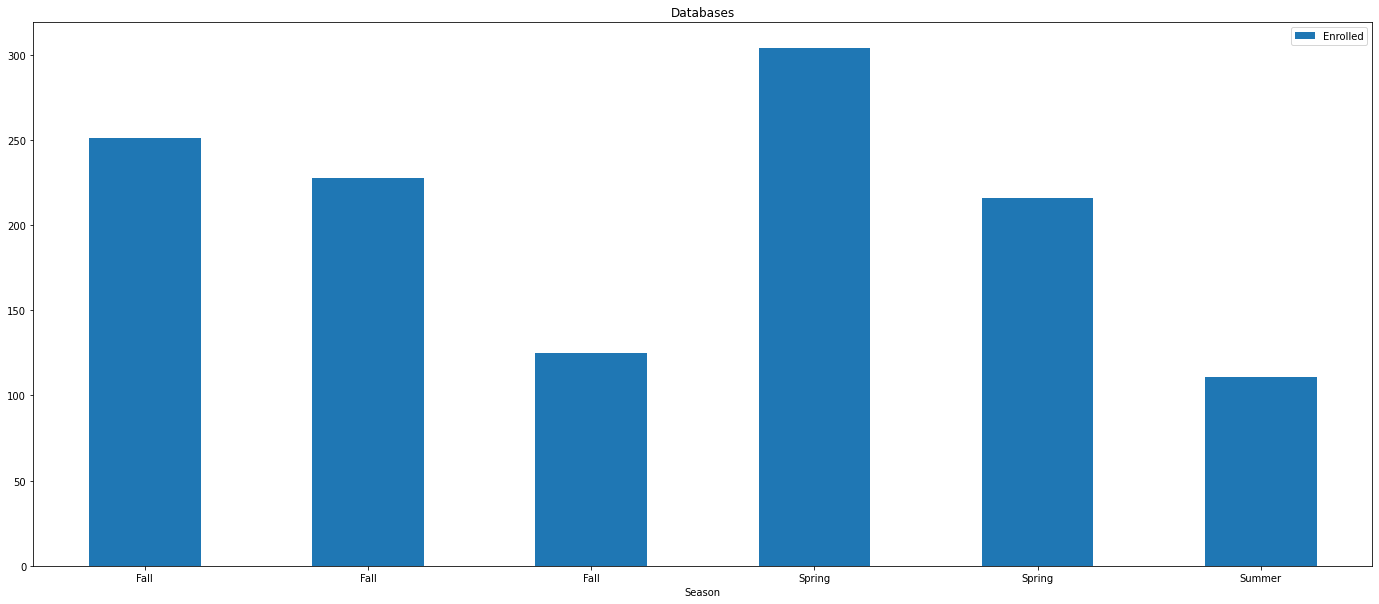

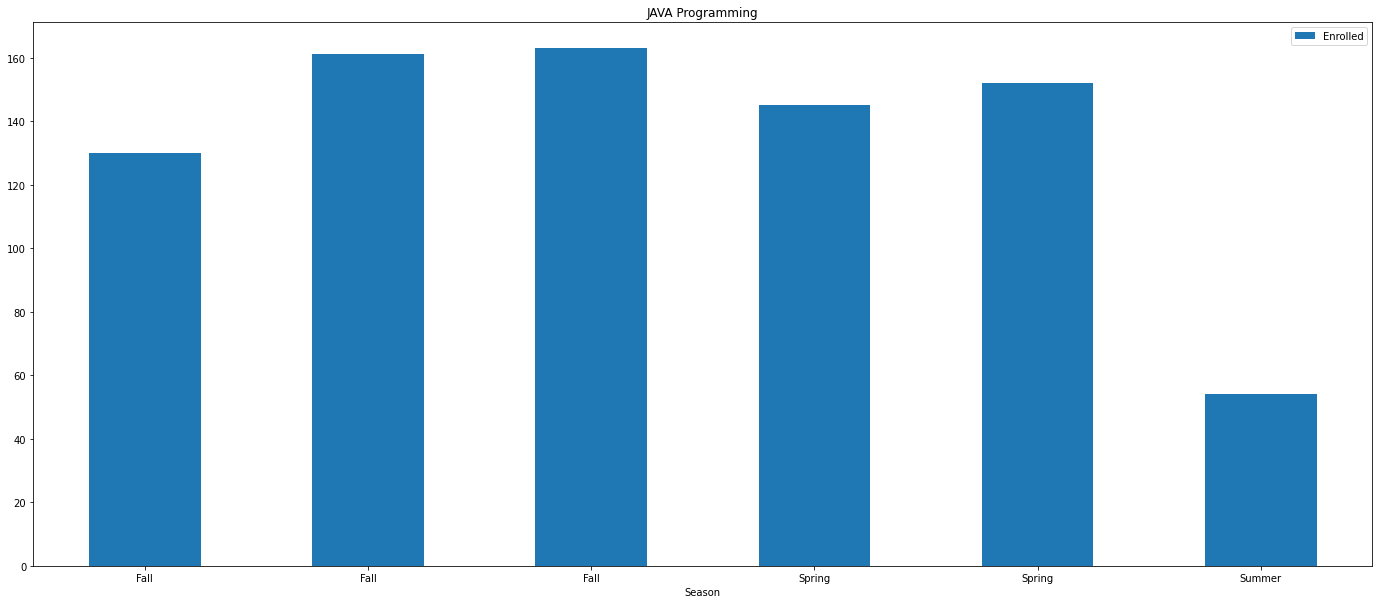

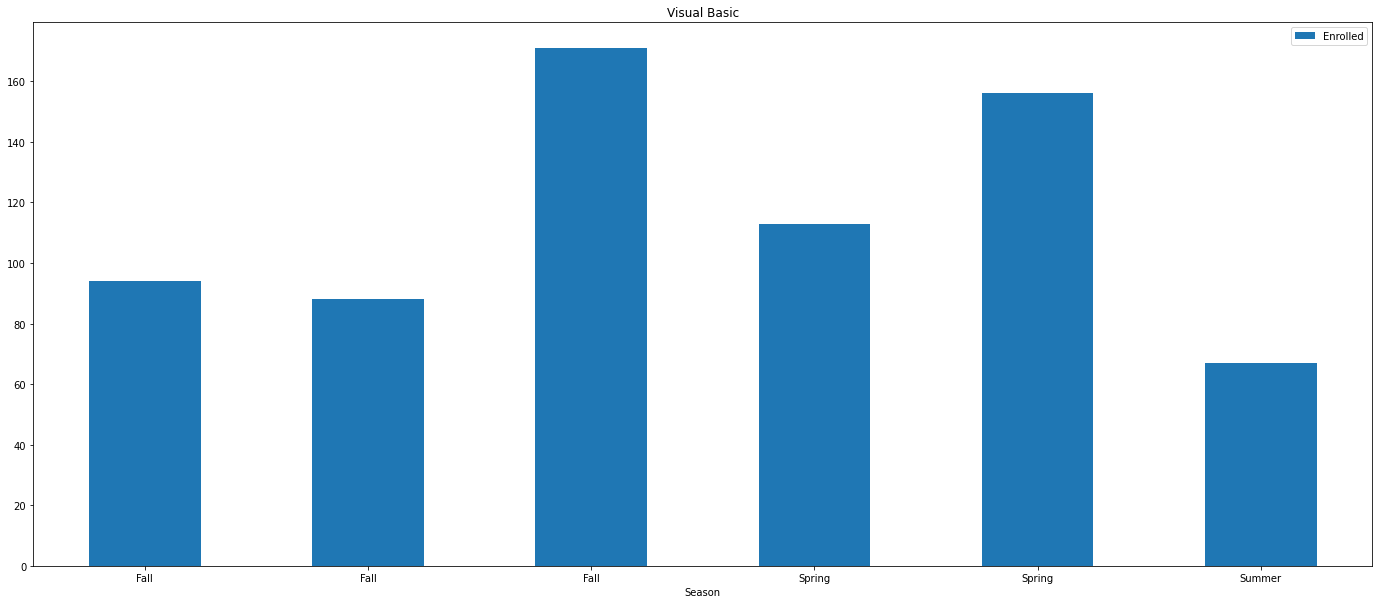

In [41]:
for title, group in seasons_by_course.groupby('Course Title'):
    if len(group) == 6:
        group.plot.bar(x='Season', y='Enrolled',figsize=(24,10), title=title, rot=0 )

## Ranking de instructor por temporada

In [42]:
seasons['Instructor'].value_counts().head(10)

Ratwatte       23
Ferguson       22
Kemp           20
Warner         19
Schwarzkopf    17
Price          15
TA             11
Jasperson      11
Carter         10
Carte          10
Name: Instructor, dtype: int64

In [43]:
seasons_by_instructor = seasons.groupby(['Season','Instructor']).sum().reset_index()
seasons_by_instructor['Enrolled'] = seasons_by_instructor['Male Enrolled'] + seasons_by_instructor['Female Enrolled'] 
seasons_by_instructor.head(15)

,Season,Instructor,Male Enrolled,Female Enrolled,Season Order,Year,Monday,Tuesday,Wednesday,Thursday,Friday,SEATS,Enrolled
0,Fall,Barth,23.0,24.0,4,2021,0,0,0,1,0,0.0,47.0
1,Fall,Benanzer,23.0,11.0,4,2019,0,1,0,0,0,0.0,34.0
2,Fall,Berry,66.0,43.0,8,4039,2,0,2,0,1,109.0,109.0
3,Fall,Black,22.0,25.0,4,2019,0,0,1,0,0,42.0,47.0
4,Fall,Busse,32.0,29.0,4,2019,0,1,0,0,0,67.0,61.0
5,Fall,Cappabianco,34.0,18.0,4,2019,1,0,1,0,1,42.0,52.0
6,Fall,Carte,112.0,95.0,16,8080,0,4,0,4,0,209.0,207.0
7,Fall,Carter,219.0,221.0,24,12120,4,0,4,2,0,555.0,440.0
8,Fall,Carter/Ferguson,24.0,32.0,4,2021,0,1,0,0,0,123.0,56.0
9,Fall,Chidambaram,139.0,133.0,24,12119,1,3,1,1,0,238.0,272.0


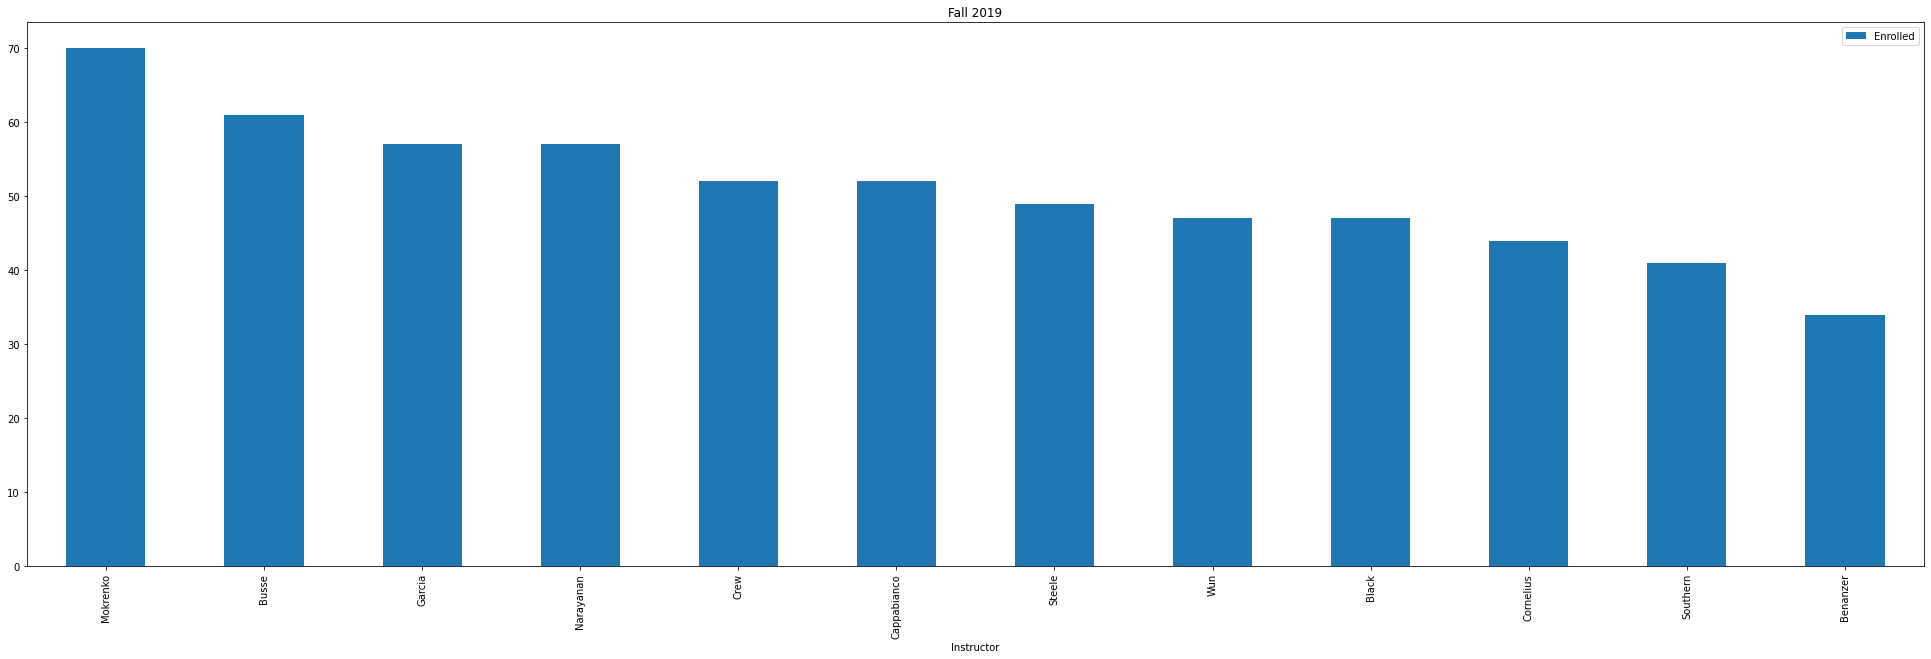

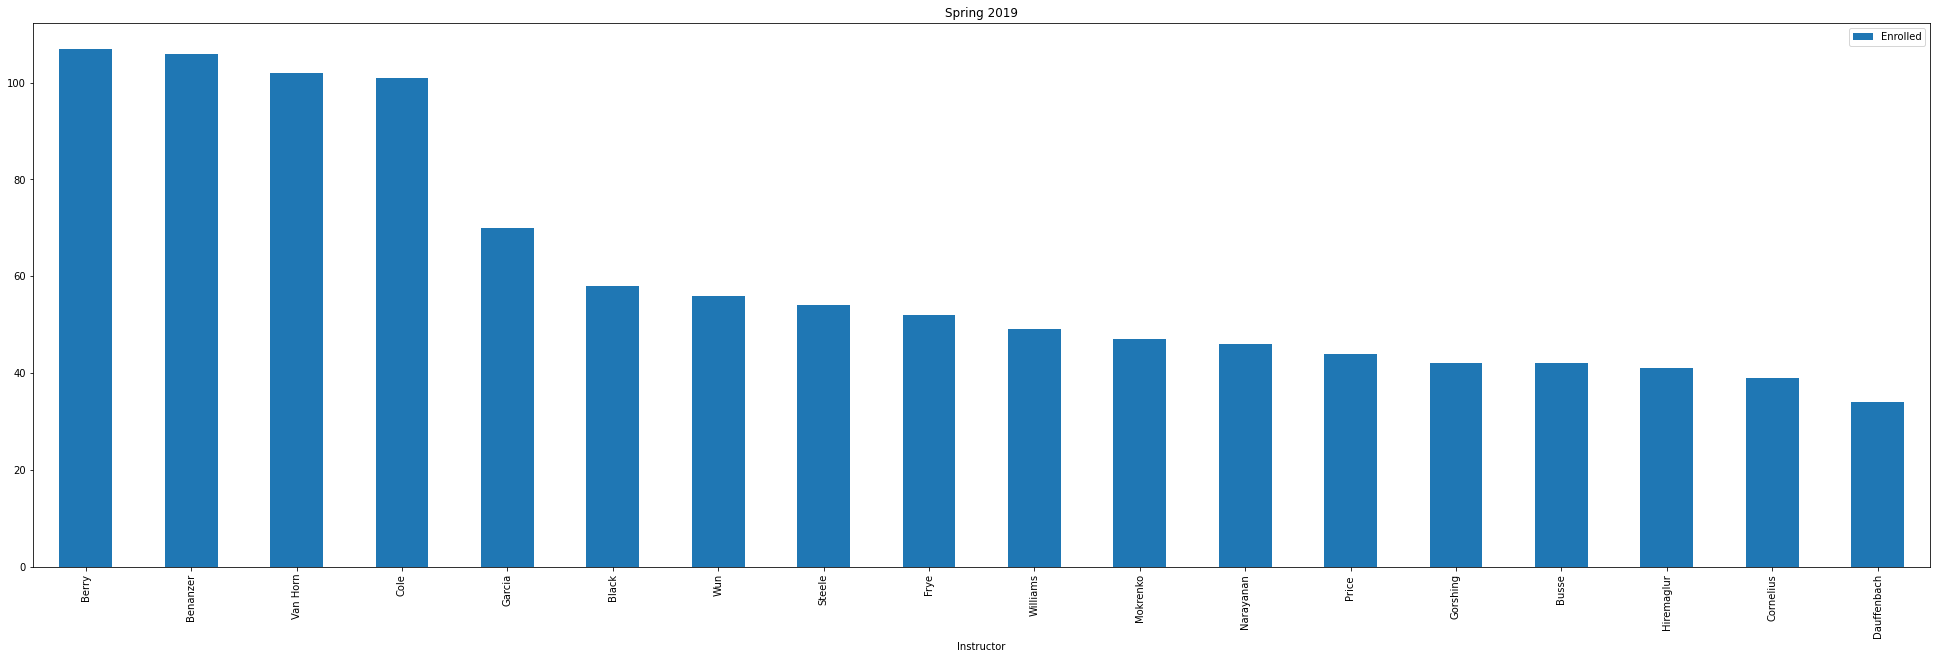

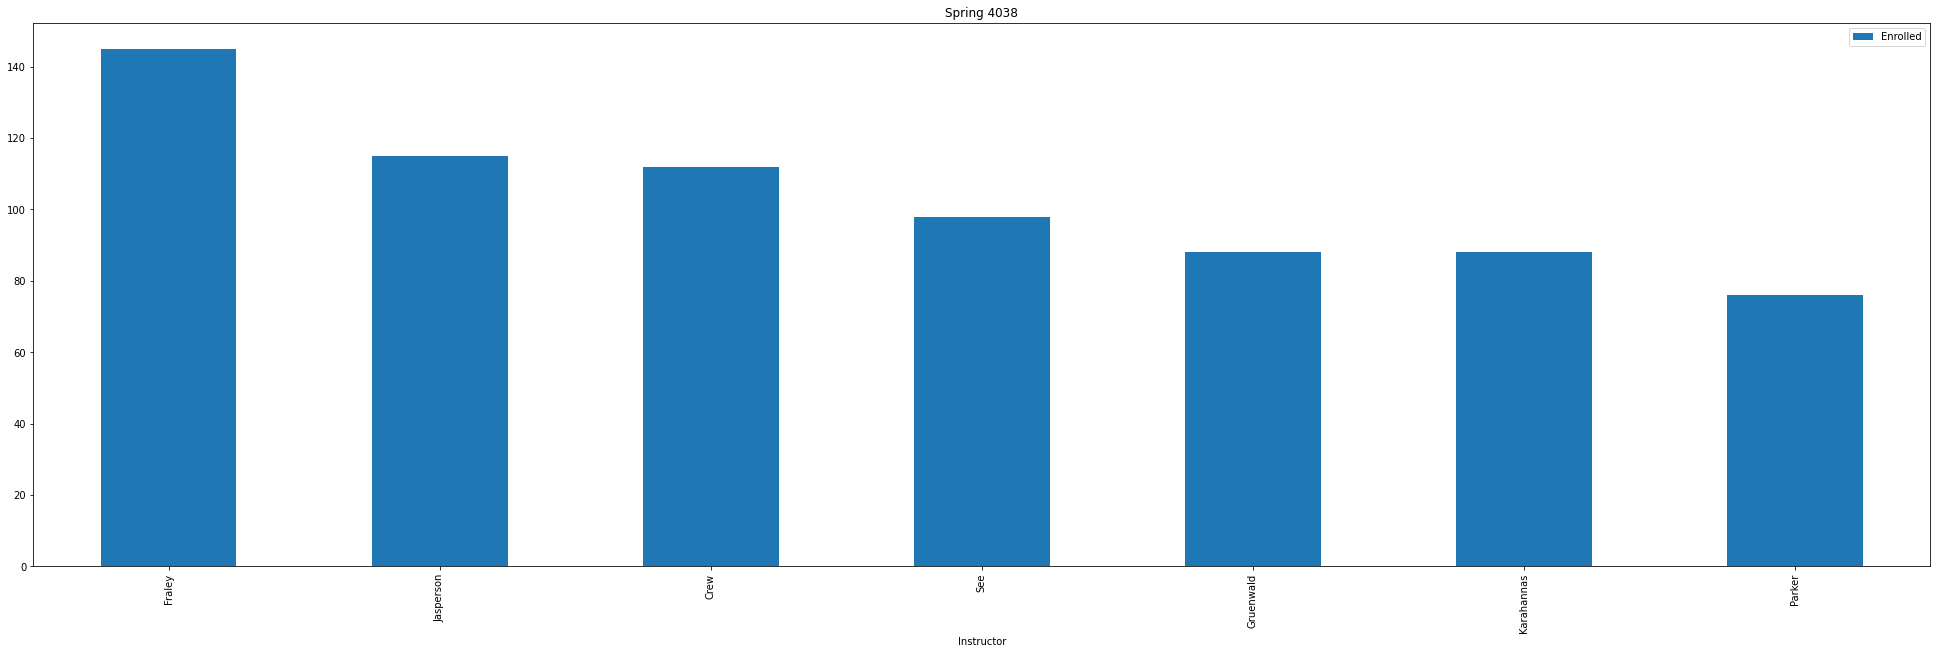

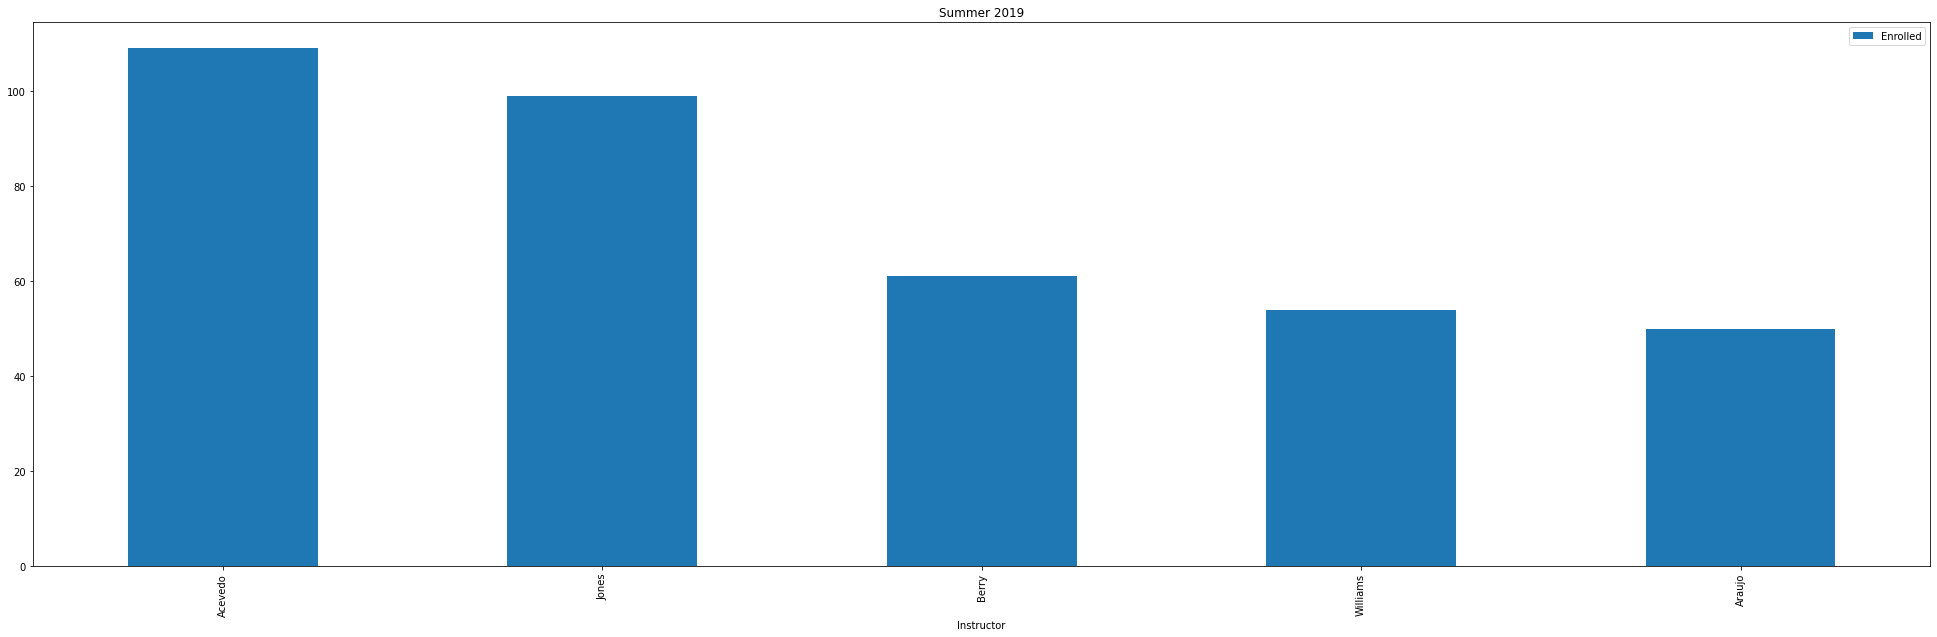

In [44]:
for title, group in seasons_by_instructor.sort_values('Enrolled', ascending=False).groupby(['Season','Year']):
    if len(group) > 4:
        group.plot.bar(x='Instructor', y='Enrolled',figsize=(34,10), title=str(title[0])+ ' ' + str(title[1]))

## Ranking de cursos mas pedidos por temporada

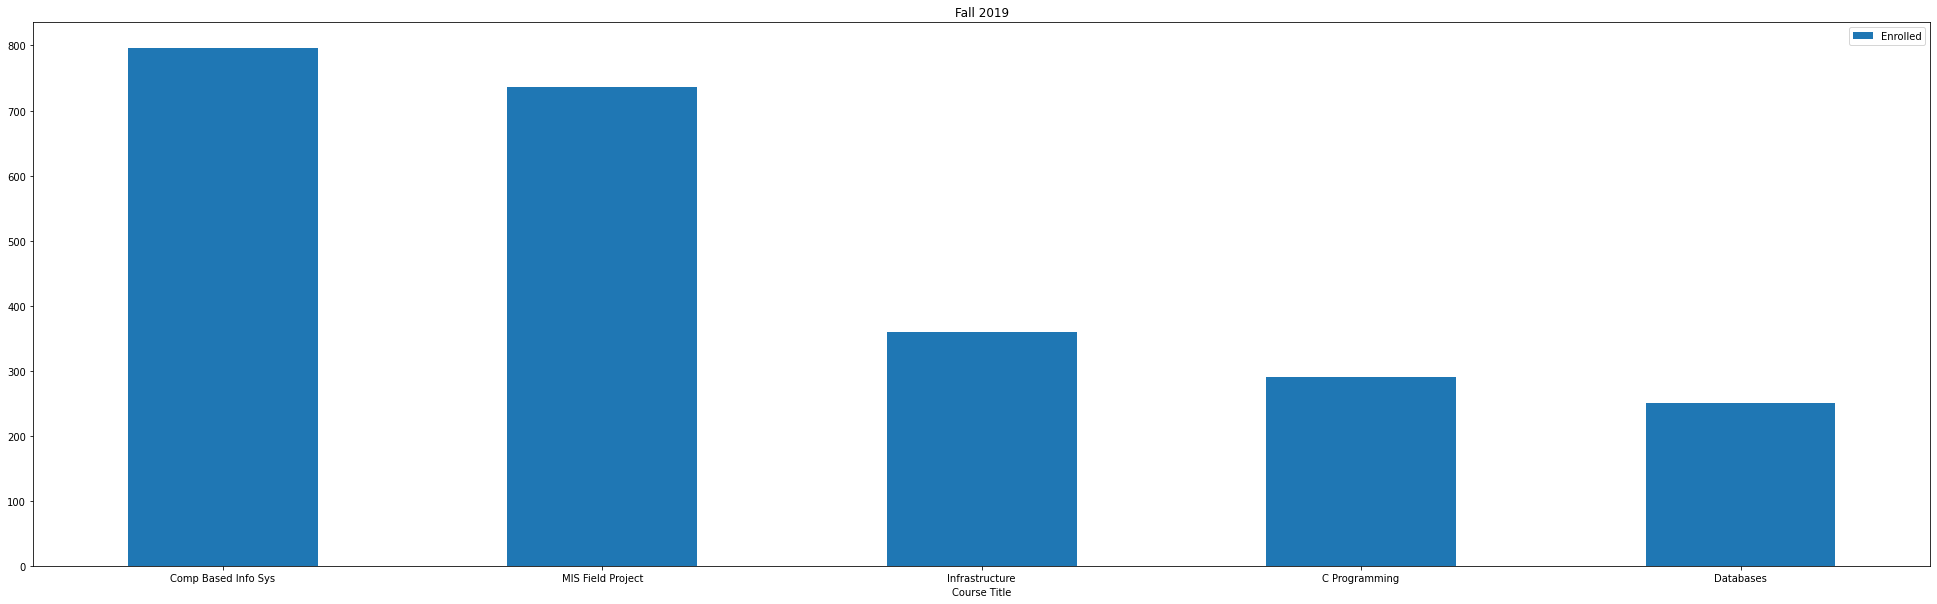

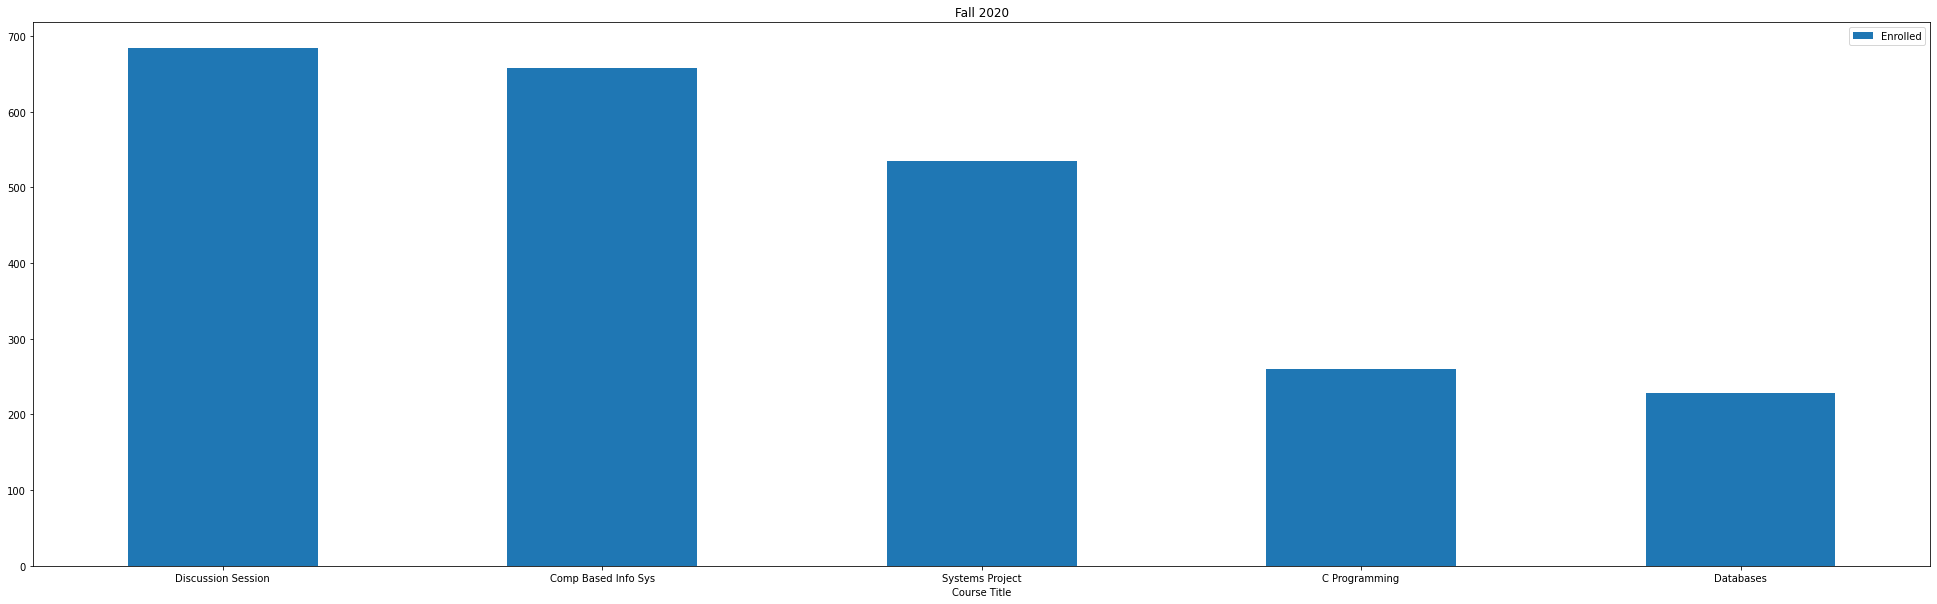

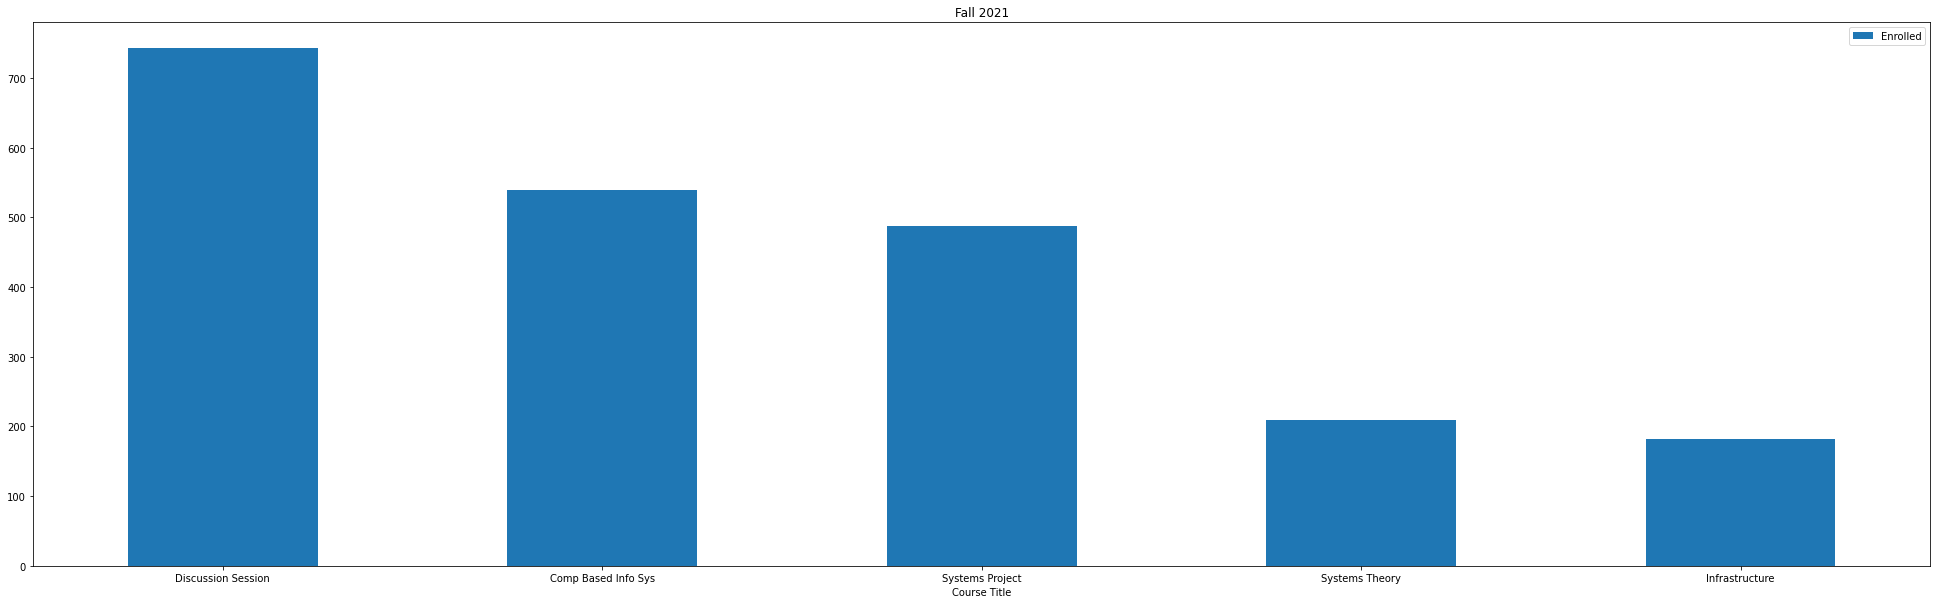

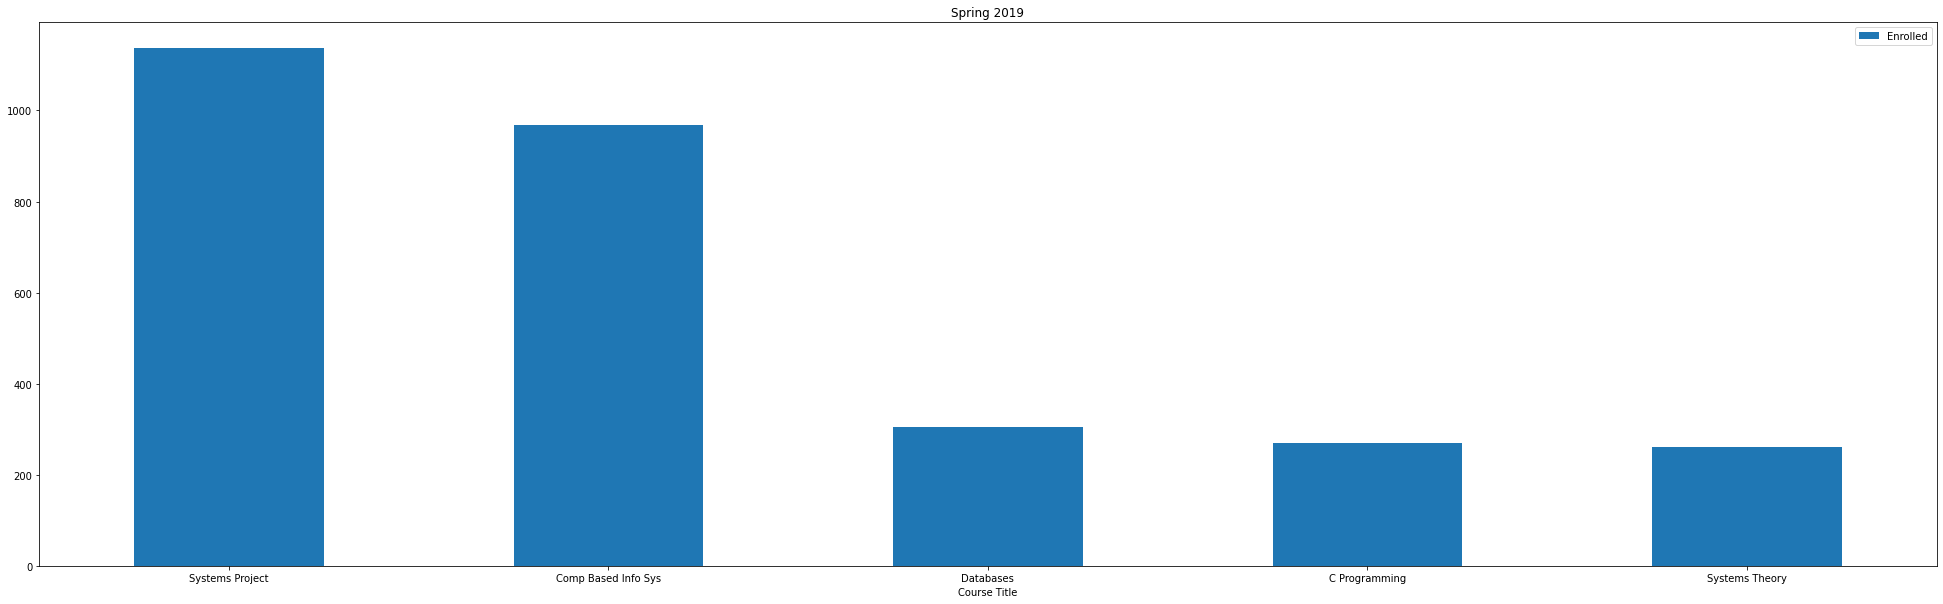

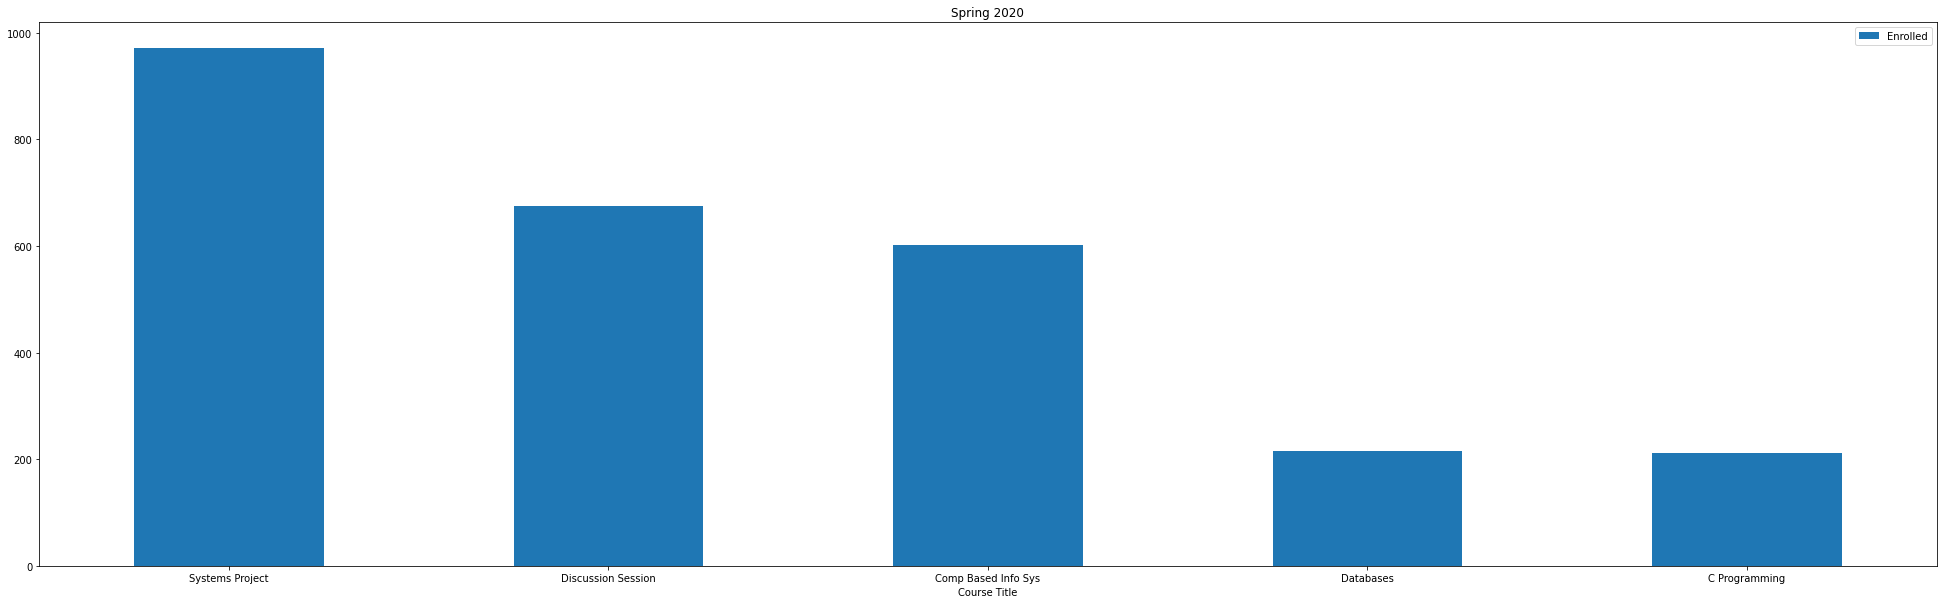

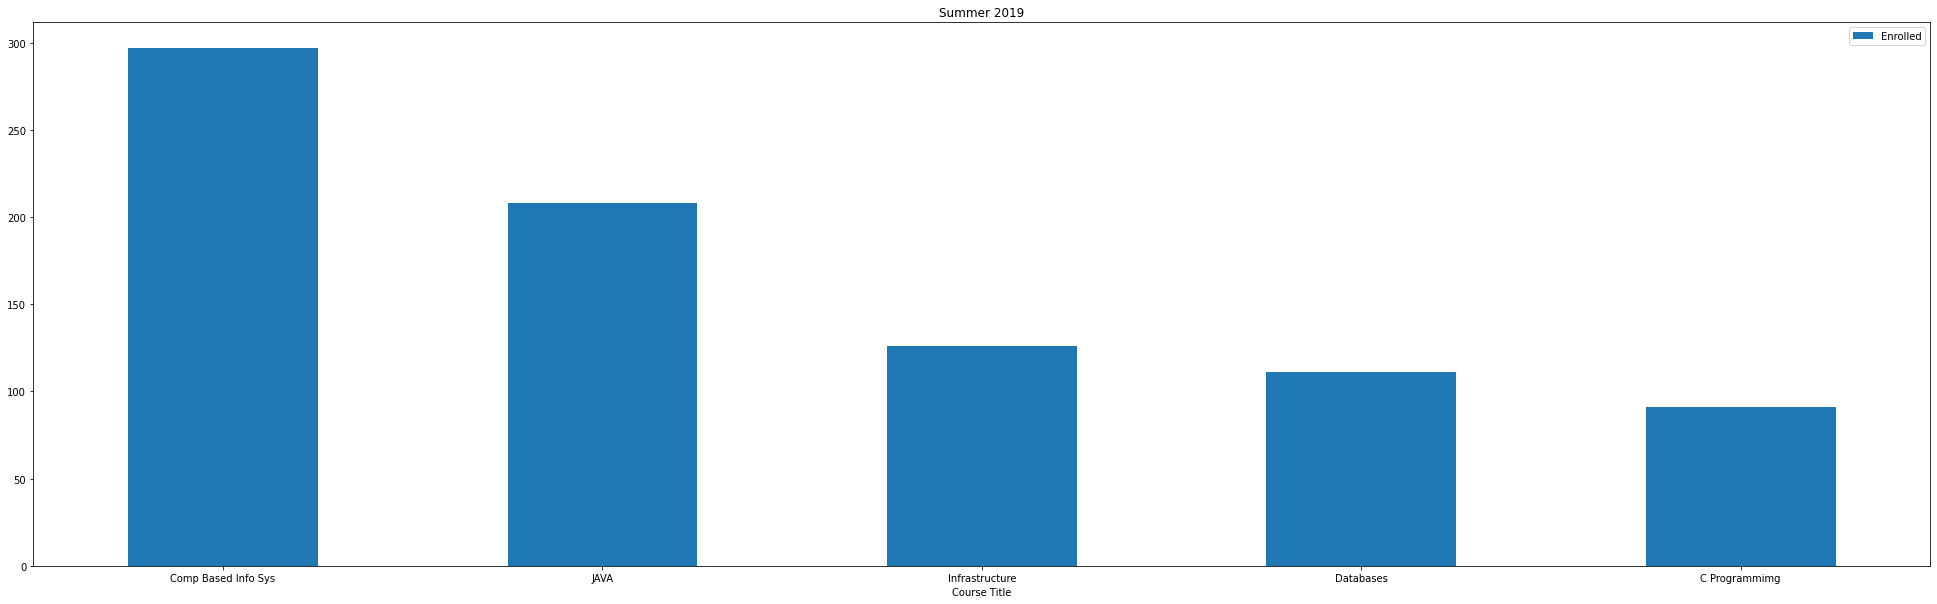

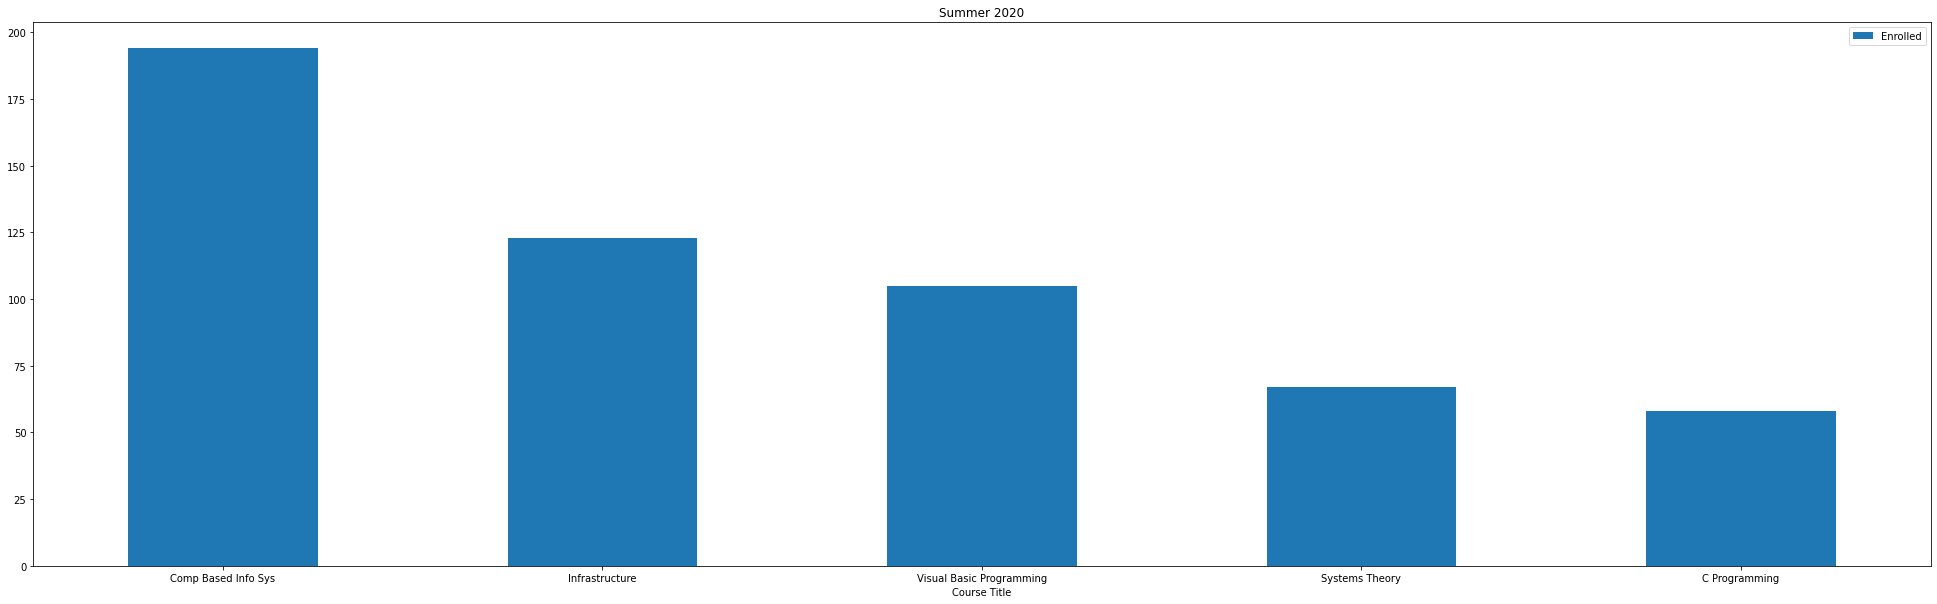

In [45]:
df = seasons_by_course.groupby(['Season','Year'])['Enrolled','Course Title'].apply(lambda x: x.nlargest(5, columns=['Enrolled']))
for title, group in df.groupby(['Season','Year']):   
    group.plot.bar(x='Course Title', y='Enrolled',figsize=(34,10), title=str(title[0])+ ' ' + str(title[1]) , rot=0)

### Ranking de cursos mas pedidos por horario

In [46]:
courses_by_hours= seasons.groupby(['Hours','Course Title'])[['Male Enrolled','Female Enrolled']].sum()
courses_by_hours = courses_by_hours.reset_index()
courses_by_hours['Enrolled'] = courses_by_hours['Male Enrolled'] + courses_by_hours['Female Enrolled'] 
courses_by_hours

,Hours,Course Title,Male Enrolled,Female Enrolled,Enrolled
0,07:30:00,Comp Based Info Sys,99.0,76.0,175.0
1,07:30:00,Discussion Session,29.0,15.0,44.0
2,07:30:00,Infrastructure,24.0,21.0,45.0
3,07:30:00,Systems Theory,23.0,21.0,44.0
4,08:10:00,Databases,32.0,29.0,61.0
...,...,...,...,...,...
94,18:30:00,Sys Arch & Design,44.0,46.0,90.0
95,18:30:00,Systems Project,864.0,858.0,1722.0
96,18:30:00,Systems Theory,46.0,66.0,112.0
97,18:30:00,Telecommunications,54.0,49.0,103.0


In [47]:
courses_by_hours.groupby(['Hours'])['Enrolled','Course Title'].apply(lambda x: x.nlargest(1, columns=['Enrolled']))

,,Enrolled,Course Title
Hours,,,
07:30:00,0,175.0,Comp Based Info Sys
08:10:00,4,61.0,Databases
08:30:00,5,103.0,C Programming
09:00:00,9,324.0,Discussion Session
09:20:00,12,137.0,Comp Based Info Sys
09:30:00,14,39.0,C Programming
10:30:00,20,303.0,Discussion Session
11:30:00,30,112.0,JAVA Programming
11:40:00,31,162.0,Comp Based Info Sys


In [48]:
courses_by_hours =courses_by_hours.groupby(['Hours'])['Enrolled','Course Title'].apply(lambda x: x.nlargest(1, columns=['Enrolled'])).droplevel(1)
courses_by_hours

,Enrolled,Course Title
Hours,,
07:30:00,175.0,Comp Based Info Sys
08:10:00,61.0,Databases
08:30:00,103.0,C Programming
09:00:00,324.0,Discussion Session
09:20:00,137.0,Comp Based Info Sys
09:30:00,39.0,C Programming
10:30:00,303.0,Discussion Session
11:30:00,112.0,JAVA Programming
11:40:00,162.0,Comp Based Info Sys


<AxesSubplot:xlabel='Course Title'>

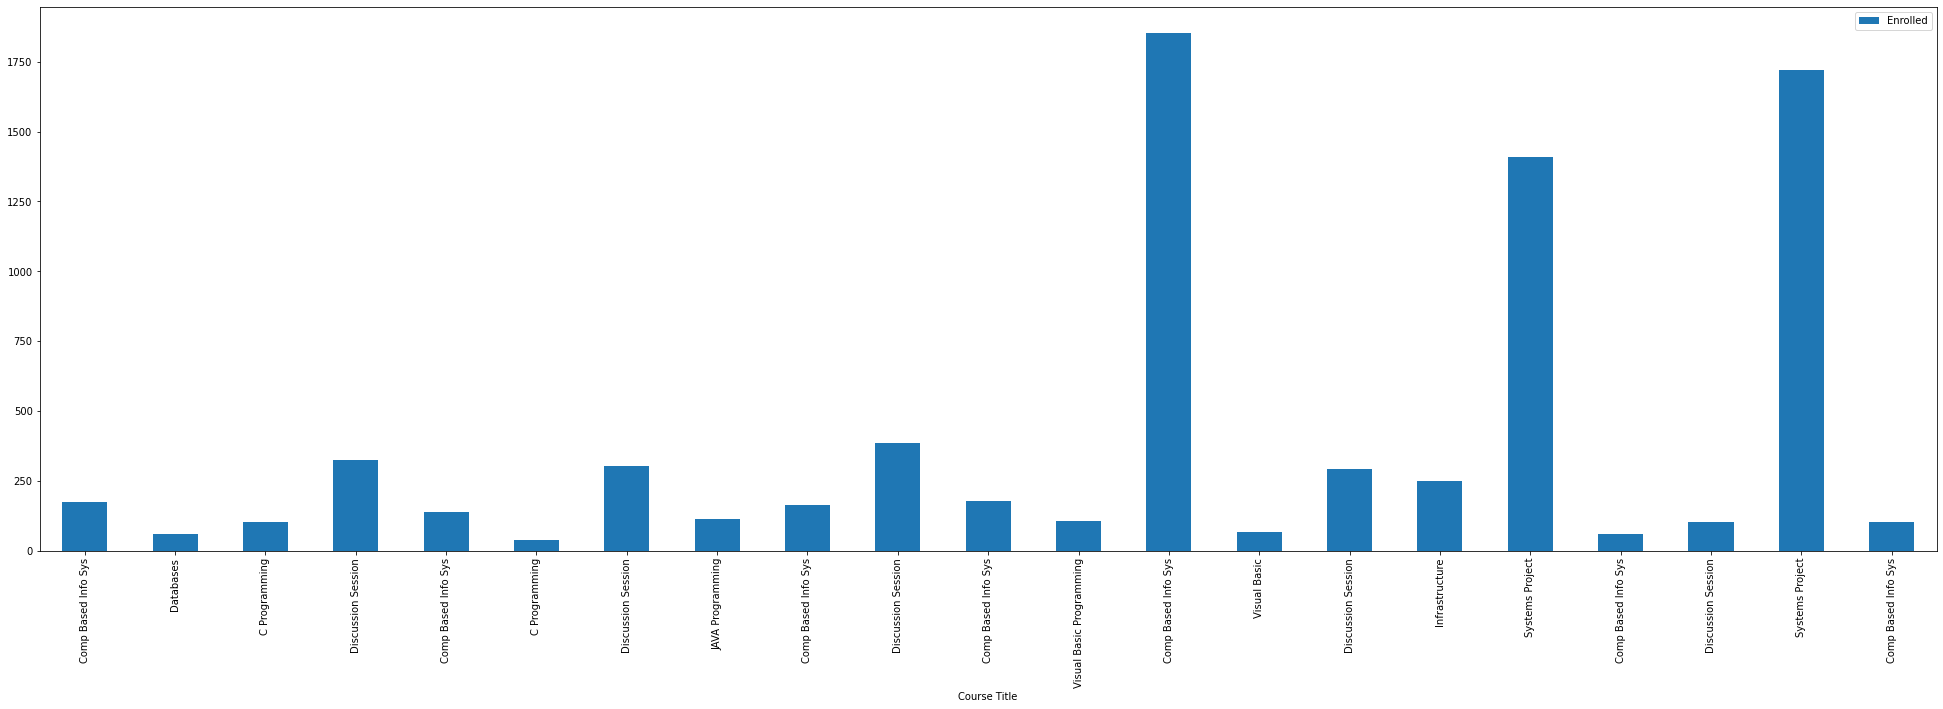

In [49]:
courses_by_hours.plot.bar(x='Course Title',y='Enrolled', figsize=(34,10))